# Seaborn이란
- Matplotlib 을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지인다.
- 시각화 기능은 Matplotlib 패키지에 의존하며
- 통계 기능은 Statsmodels 패키지에 의존한다.

###### 폰트설정

In [21]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from pathlib import Path

In [22]:
import matplotlib.font_manager as font_manager
import matplotlib as mpl
# Add every font at the specified location
font_dir = ['C:/python/fonts']
for font in font_manager.findSystemFonts(fontpaths=font_dir):
    print(mpl.font_manager.FontProperties(fname=font).get_name())
    font_manager.fontManager.addfont(font)
# Set font family globally
mpl.rcParams['font.family'] = 'Nanum Pen'
print(mpl.rcParams['font.family'])
# 유니코드에서 음수 부호설정
mpl.rc('axes', unicode_minus=False)

NanumGothic
Nanum Pen
['Nanum Pen']


In [39]:
# 그래프 출력이 안될 시
%matplotlib inline

### 카운트 플롯
- countplot() 을 사용하면 각 카테고리 값마다의 데이터가 얼마나 있는지 표시할 수 있다.
- value_counts()를 보듯이 각 유니크한 값들이 몇개씩 있는지 시각적으로 확인 가능
- 카운트 플롯은 카테고리별 히스토그램이라 볼 수 있다. 
- API 옵션은 바차트와 동일(모양도 바차트와 동일)

#### 테마를 활용해서 스타일 적용하기
- set_theme()는 global 범위의 테마를 적용해서 그래프를 쉽게 꾸밀 수 있다.
- style과 palette 키워드 인수를 활용해서 그 값을 설정한다.
    - style = darkgrid, whitegrid, dark, white, ticks,...
    - palette = pastel, husl, spectral, flasre, ...
- set_context()의 인수로 paper, notebook, talk , poster 중 하나를 넣으면 해당하는 설정을 세팅할 수 있다.

In [19]:
import seaborn as sns
sns.set_theme(style = 'whitegrid')
sns.set_context('paper')

<AxesSubplot:xlabel='class', ylabel='count'>

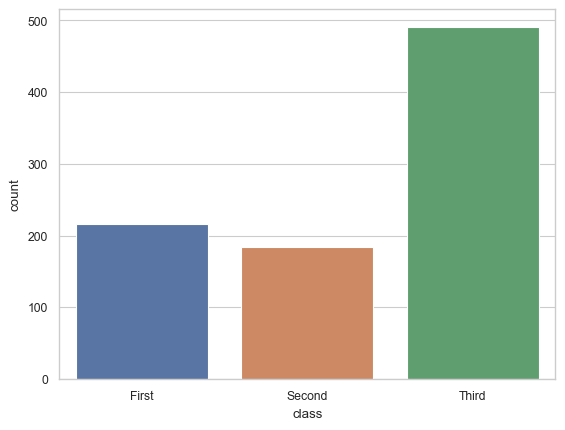

In [20]:
df = sns.load_dataset('titanic')
sns.countplot(x = df['class']) # x 키워드 인수에 Series 값을 전달한다.

- hue 키워드 인수를 활용해서 분류할 두 번째 변수를 설정할 수 있다.
- data 키워드 인수에 DataFrame을 전달하고, x 키워드 인수에 DataFrame 중 매칭하고 싶은 column의 name을 전달한다.

<AxesSubplot:xlabel='class', ylabel='count'>

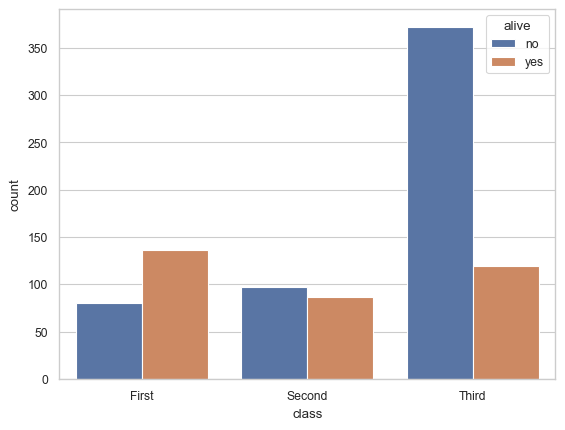

In [13]:
# groupby
sns.countplot(data = df , x = 'class',hue='alive') # data영역에 titanic 자체를 넣고 x 에 column 정보를 담아도 된다.
# alive column을 두 번째 변수로 지정하여 선실별 생존 여부를 가시적으로 확인할 수 있도록 돕는다.

- 플롯을 수평하게 작성할 수도 있다.
- y 키워드 인수에 data로 넘긴 DataFrame의 column name 값을 전달하면 된다.

<AxesSubplot:xlabel='count', ylabel='class'>

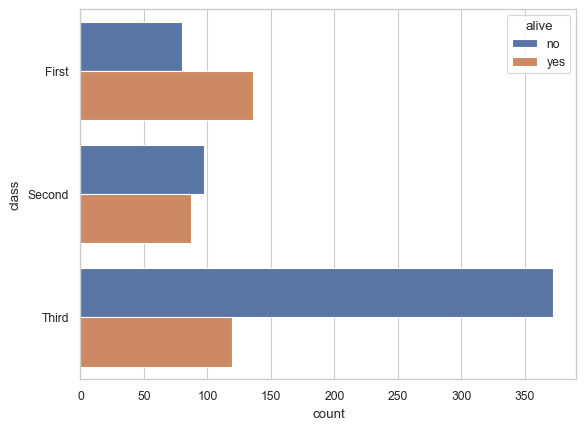

In [4]:
sns.countplot(data = df , y = 'class',hue='alive')

### tips 데이터셋

#### 각 column마다의 의미는 다음과 같습니다.
- total_bill: 총 지불 금액($)
- tip: 팁($)
- sex: 성별
- smoker: 흡연 여부
- day: 요일
- time: 식사 시간대
- size: 식사 인원

In [5]:
tips = sns.load_dataset('tips')
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

### rugplot()
- 데이터 위치를 x 축 위에 작은 선분(rug)으로 나타내어 실제 데이터들의 위치를 보여준다
- 커널 밀도는 커널이라는 함수를 겹치는 방법으로 히스토그램보다 부드러운 형태의 분포 곡선을 보여주는 방법이다.

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

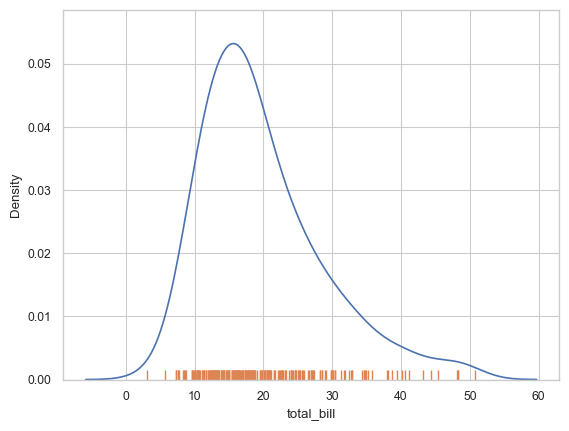

In [6]:
sns.kdeplot(data=tips,x='total_bill') # 위에 파란선 (밀도를 보기 유리함)
sns.rugplot(data=tips,x='total_bill') # 밑에 주황색점 (밀도를 볼 수 있음.)

- scatterplot을 사용해서 y에 tip에 대한 column name을 넣어주어서 전체 금액 대비 tip의 비용이 얼마인지 볼 수 있다.  
  (x,y를 부여해서 점형태로 분포를 볼 수 있다.)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

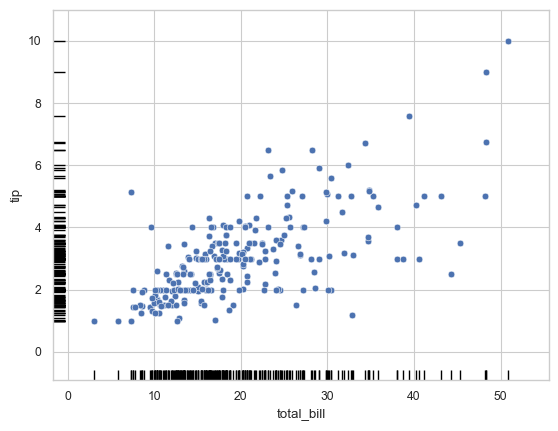

In [7]:
sns.scatterplot(data=tips,x='total_bill',y= 'tip')  # 점점 플롯
sns.rugplot(data=tips,x='total_bill', y = 'tip',color = 'black')   # 밑에 검정 분포

- hue 속성에 추가 값을(time column) 넣어서 식사시간 별로 추가 분류(색으로) 하여 가시적으로 보임

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

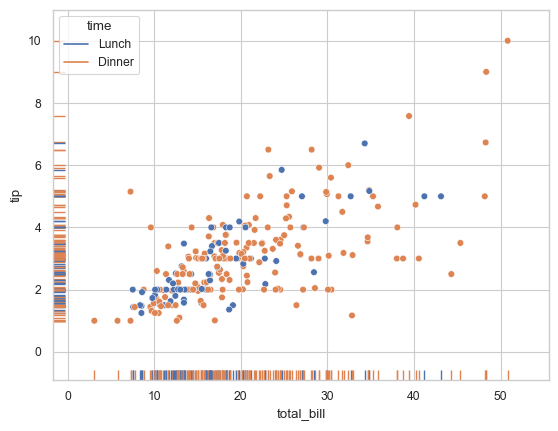

In [8]:
sns.scatterplot(data=tips,x='total_bill',y= 'tip', hue= 'time')  
sns.rugplot(data=tips,x='total_bill', y = 'tip',color = 'black', hue = 'time')

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

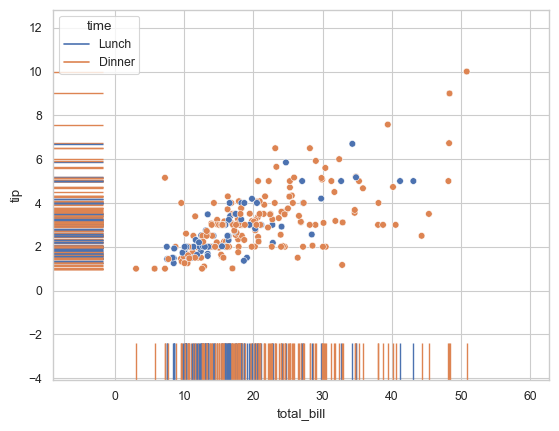

In [9]:
sns.scatterplot(data=tips,x='total_bill',y= 'tip', hue= 'time')  
sns.rugplot(data=tips,x='total_bill', y = 'tip',hue='time',height = .1) # rugplot의 크기를 조절하기 위해 height 키워드를 사용가능하다.

<AxesSubplot:xlabel='carat', ylabel='price'>

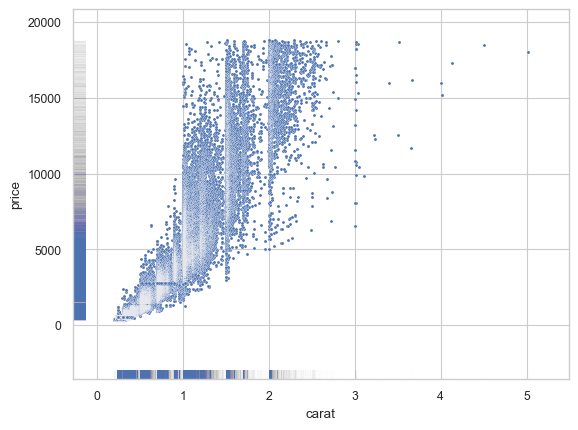

In [11]:
diamonds = sns.load_dataset('diamonds')
sns.scatterplot(data=diamonds, x = 'carat', y='price',s=5)
sns.rugplot(data=diamonds,x = 'carat',y = 'price', lw=1, alpha=.005)


### 히스토그램
- 1차원 혹은 2차원 데이터를 보는데 유용하다

#### penguins dataset
- 'Adelie', 'Chinstrap', 'Gentoo' 총 3 분류의 펭귄에 대한 데이터셋입니다.

- species: 펭귄의 종(Chinstrap, Adélie, Gentoo)
- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: 체중(g)
- island: 서식지 섬 (Dream, Torgersen, Biscoe) in
the Palmer Archipelago (Antarctica)
- sex: 펭귄 성별

In [24]:
penguins = sns.load_dataset('penguins')
penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

In [4]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


#### hisplot()

##### histplot() x축 기준
- x 키워드 인수로 columns label 값을 전달한다.
- 좌측 y축은 개수를 표현하고 있다.

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

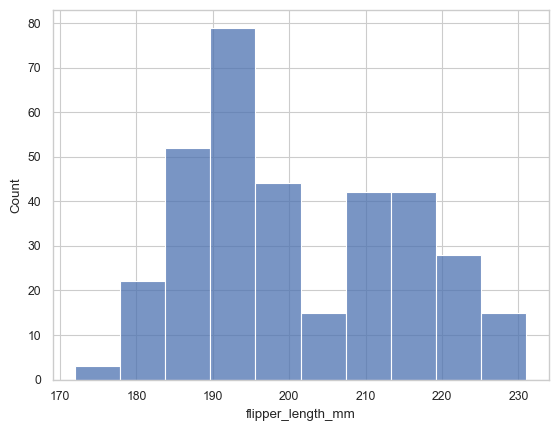

In [45]:
sns.histplot(data = penguins,x = 'flipper_length_mm') # 하지만 이정도 분류로는 파악이 어렵다.

##### histplot() y축 기준
- x 키워드 인수를 y 키워드 인수로 변경하여 표현 가능

<AxesSubplot:xlabel='Count', ylabel='flipper_length_mm'>

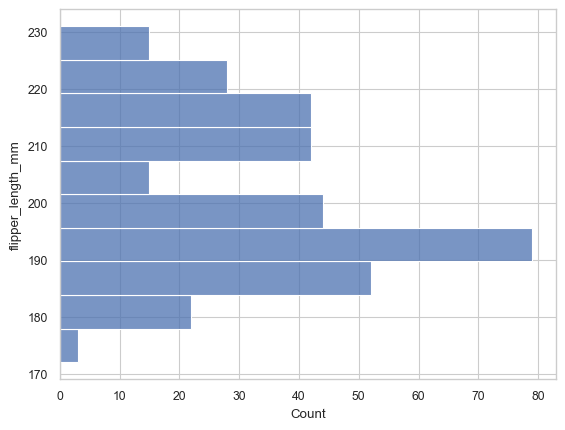

In [46]:
sns.histplot(data = penguins, y = 'flipper_length_mm')

##### histplot() bin 너비 지정하기
- binwidth 키워드 인수를 사용해서 bin의 너비를 지정할 수 있다.

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

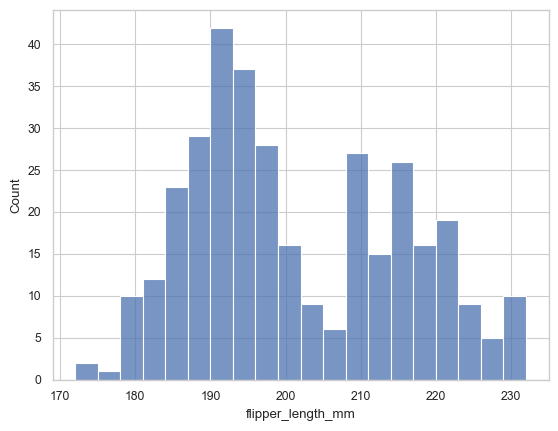

In [47]:
sns.histplot(data = penguins,x = 'flipper_length_mm',binwidth=3) # x축의 너비를 3씩나눔

##### histplot() bin 개수 지정하기
- bins 키워드 인수를 사용해서 bin의 개수(막대의 개수)를 지정할 수도 있다.

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

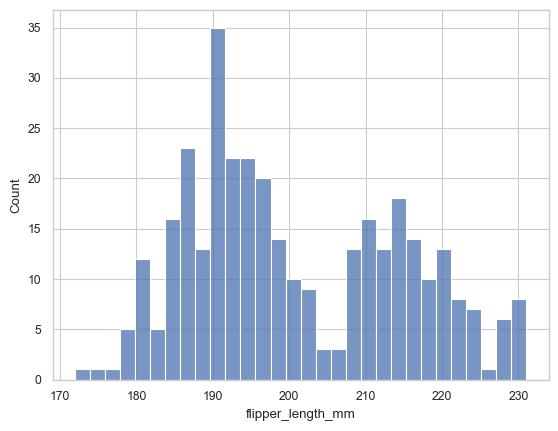

In [50]:
sns.histplot(data = penguins,x = 'flipper_length_mm',bins = 30)

##### histplot() kde(kernal density) 를 동시에 표시하기
- kde 키워드 인수를 True로 바꿔줌으로써 함수를 겹치는 방법으로 히스토그램보다 부드러운 형태의 분포 곡선을 보여준다.

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

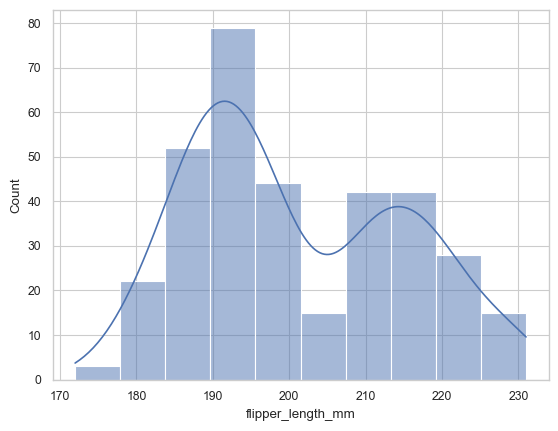

In [51]:
sns.histplot(data=penguins,x = 'flipper_length_mm',kde=True)

##### histplot() hue 키워드 인수로 데이터 분리하기
- hue 키워드 인수에 분류 기준이 될 column label을 전달해서 여러 개의 히스토그램을 합친것과 같은 결과의 그래프를 얻을 수 있다.

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

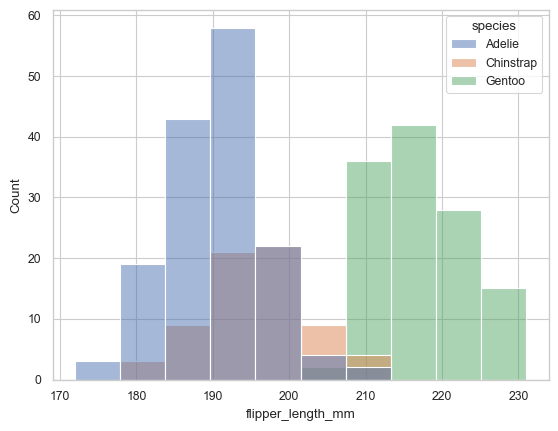

In [52]:
sns.histplot(data=penguins,x = 'flipper_length_mm',hue='species') # 좀 더 보기 명확해졌다.

##### histplot() 다양한 표현법 stack
- 각 히스토그램의 layer가 겹친다면 이를 누적하듯 표현하는 방법도 있다

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

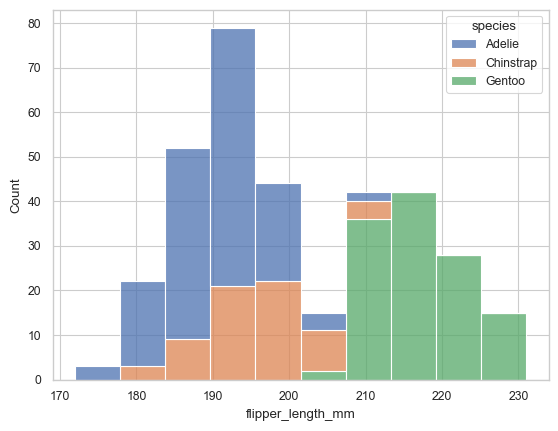

In [53]:
sns.histplot(data=penguins,x = 'flipper_length_mm',hue='species',multiple = 'stack')

##### histplot() 다양한 표현법 step
- 오버래핑된 결과가 보기 힘들 때 해결방법 중 하나이다.
- elements 키워드 인수에 'step'이란 값을 전달하여 shape에 치중하여 더 잘 보이도록 할 수 있다.

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

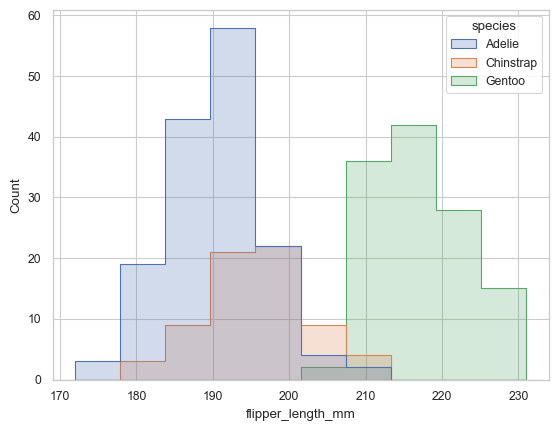

In [54]:
sns.histplot(data=penguins,x = 'flipper_length_mm',hue='species',element = 'step')

##### histplot() 다양한 표현법 poly
- element 인자에 'poly' 값을 전달하면 더 눈에 잘 다각형 모양으로 변경된다.

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

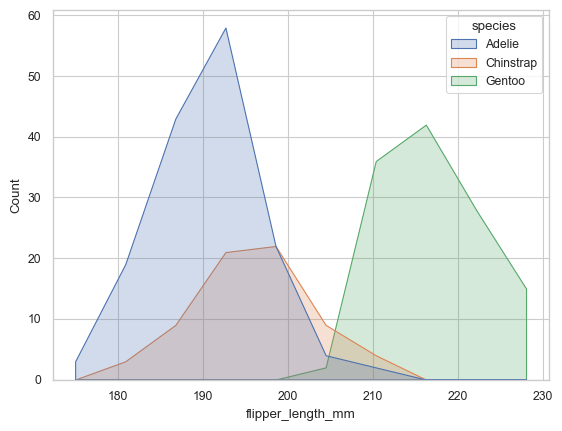

In [55]:
sns.histplot(data=penguins,x = 'flipper_length_mm',hue='species',element= 'poly')

##### heatmap
- x,y 축에 모두 column을 할당할경우 만들어지는 형태이다.

<AxesSubplot:xlabel='bill_depth_mm', ylabel='body_mass_g'>

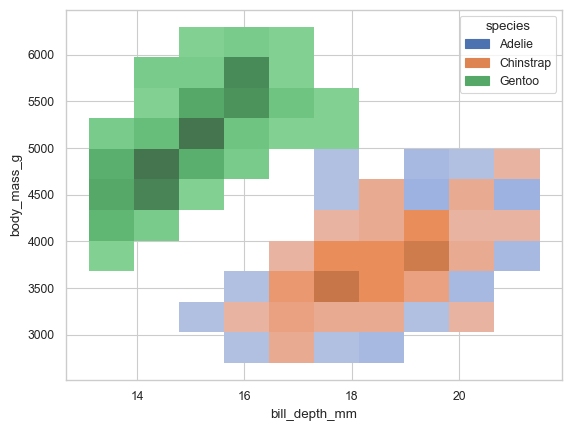

In [59]:
sns.histplot(data=penguins,x = 'bill_depth_mm',y= 'body_mass_g',hue='species') # 진할수록 데이터가 더 겹친다는 의미.

- x,y 축 모두 column을 할당할 때 그 중 하나의 값이 이산된 값이라면 아래와 같이 데이터를 시각화하여 표현하면 훨씬 이해하기 좋다.

<AxesSubplot:xlabel='bill_depth_mm', ylabel='species'>

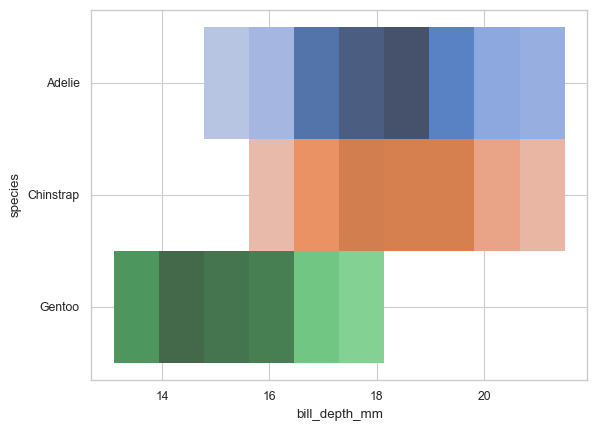

In [60]:
sns.histplot(data=penguins,x = 'bill_depth_mm',y= 'species',hue='species',legend = False)  # 

#### displot()
- 1,2차원 데이터의 분포를 히스토그램으로 보여준다.
- 다만 rug와 kde에 대해 동시에 표현이 가능해서 표현 범위가 더 넓고 더 많이 사용된다.

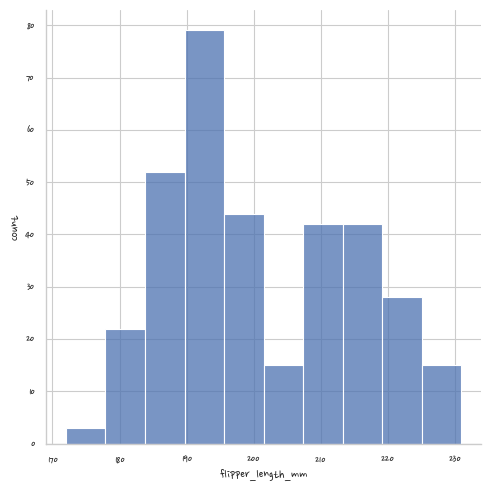

In [27]:
sns.displot(data=penguins, x = 'flipper_length_mm') # histplot()과 동일한 인수와 그래프 모양을 보인다.

##### displot() kde로 표현하기
- kind 키워드 인수를 활용해서 히스토그램 종류를 kde로 변경 가능하다.(부드러운 곡선형태)

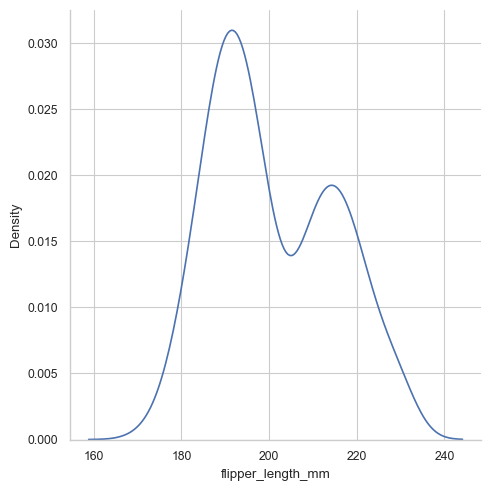

In [63]:
sns.displot(data=penguins, x = 'flipper_length_mm',kind= 'kde')

##### displot() ecdf로 표현하기
- kind 키워드 인수에 ecdf 를 활용해서 누적 분포 그래프로 표현 가능하다.

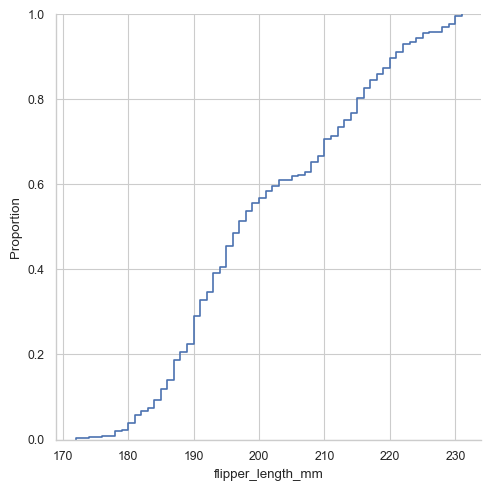

In [64]:
sns.displot(data=penguins, x = 'flipper_length_mm',kind= 'ecdf')

##### displot() 히스토그램과 kde 동시에 표현하기
- kde 키워드 인수 값을 True 로 전달하면 히스토그램와 kde를 동시에 표현 가능하다.

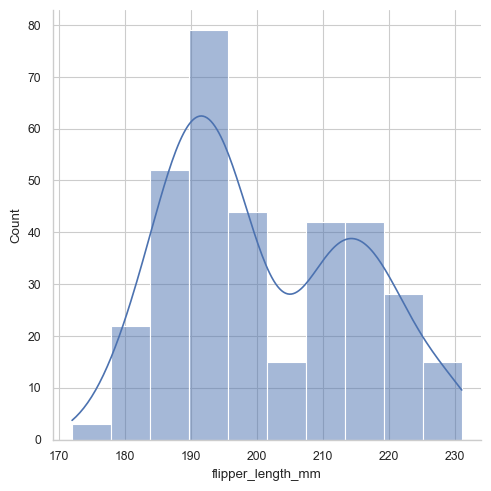

In [65]:
sns.displot(data=penguins, x = 'flipper_length_mm',kde = True)

##### displot() x, y 모두 값 할당하기
- x,y에 각각 값을 할당하여 히트맵 형태로 그래프를 출력할 수 있다.

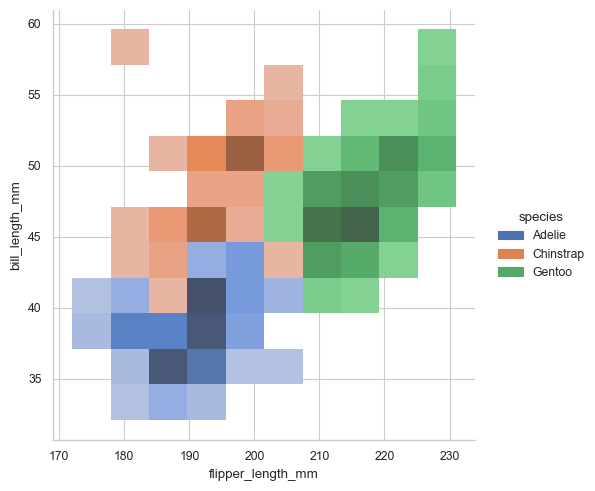

In [67]:
sns.displot(data=penguins, x = 'flipper_length_mm',y = 'bill_length_mm',hue = 'species')

##### displot() 2개 값을 kde로 표현하기
- x,y축 모두 할당한 앞의 히스토그램을 kde로도 표현 가능하다.
- 또한 rug = True 키워드 인수를 전달해서 rug에 대한 표현도 동시에 가능하다.

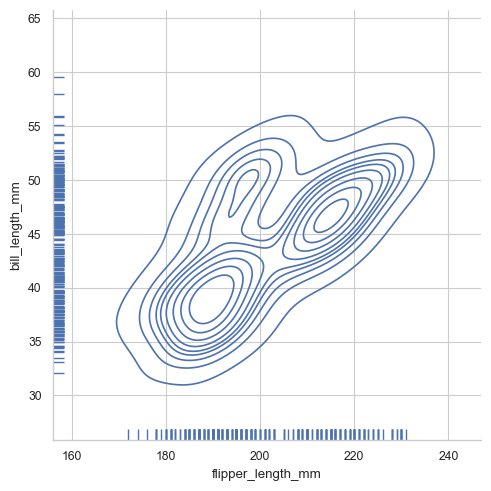

In [69]:
sns.displot(data=penguins, x = 'flipper_length_mm',y = 'bill_length_mm',kind = 'kde',rug=True)

##### displot() hue로 subset 나누기

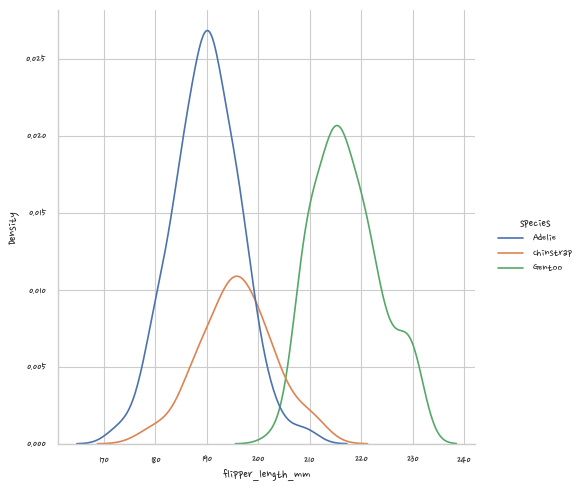

In [35]:
# Each kind of plot can be drawn separately for subsets of data using hue mapping
sns.displot(data=penguins, x="flipper_length_mm", hue="species", kind="kde")

##### displot() 2개 값을 col로 그래프 나누기

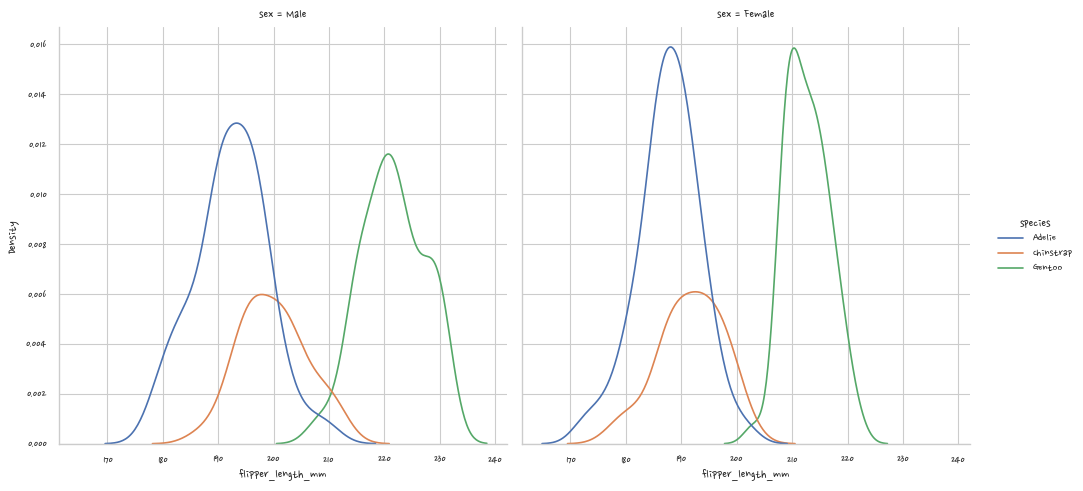

In [32]:
# The figure is constructed using a FacetGrid,
# meaning that you can also show subsets on distinct soubplot, or "facets":
sns.displot(data=penguins, x="flipper_length_mm", hue='species', col='sex', kind='kde')

##### displot() 그래프 크기 설정

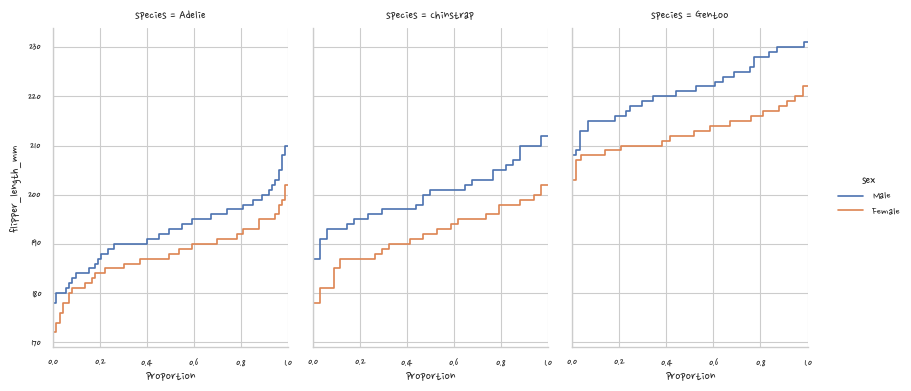

In [34]:
# Because the figure is drawn with a FacetGrid, you control its size and shape with the height and aspect parameters
sns.displot(
    data=penguins, y='flipper_length_mm', hue='sex', col='species',
    kind='ecdf', height=4, aspect=.7,
)

##### displot() col로 그래프 나누기

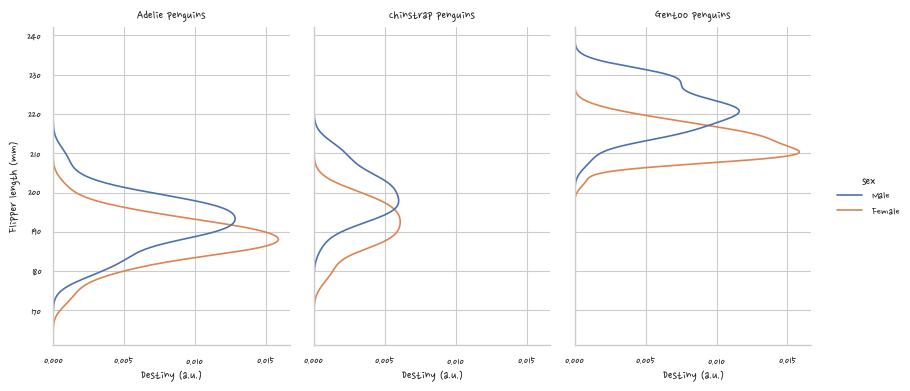

In [41]:
g = sns.displot(
    data=penguins, y='flipper_length_mm', hue='sex', col='species',
    kind='kde', height=4, aspect=.7,
)
g.set_axis_labels("Destiny (a.u.)", "Flipper length (mm)")
g.set_titles("{col_name} penguins")

### barplot()

<AxesSubplot:xlabel='species', ylabel='body_mass_g'>

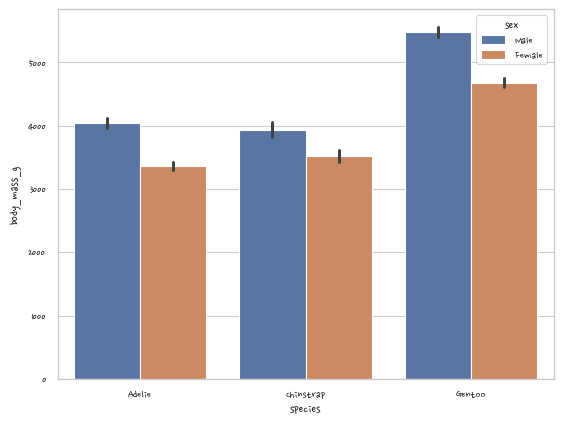

In [44]:
df = sns.load_dataset("penguins")
sns.barplot(data=df, x="species", y="body_mass_g", hue="sex")

### boxplot()

<AxesSubplot:xlabel='age'>

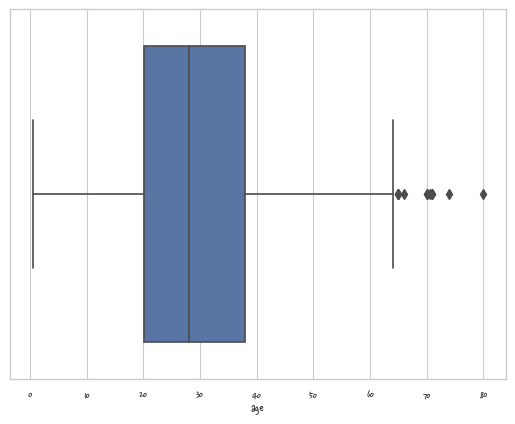

In [45]:
df = sns.load_dataset("titanic")
sns.boxplot(x=df["age"])

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


<AxesSubplot:xlabel='age', ylabel='class'>

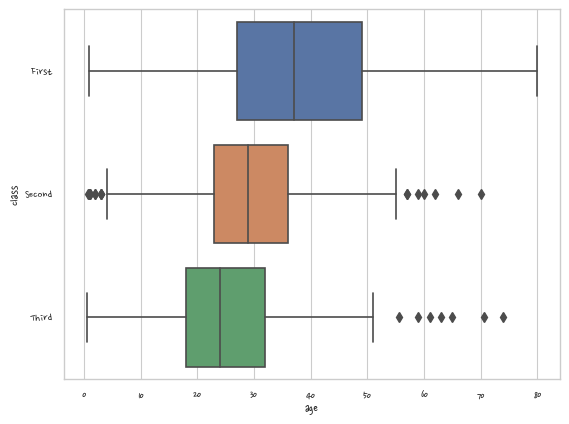

In [48]:
sns.boxplot(data=df, x="age", y="class")

<AxesSubplot:xlabel='age', ylabel='class'>

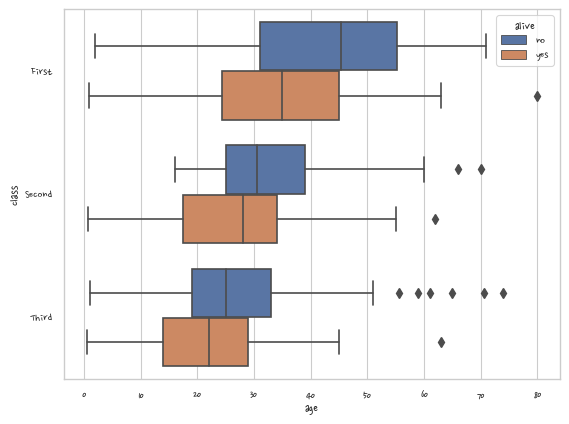

In [50]:
sns.boxplot(data=df, x="age", y="class", hue="alive")

<AxesSubplot:xlabel='fare', ylabel='alive'>

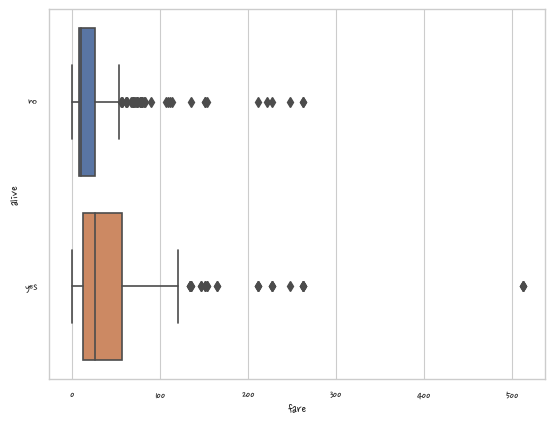

In [51]:
sns.boxplot(data=df, x="fare", y="alive")

<AxesSubplot:xlabel='fare', ylabel='alive'>

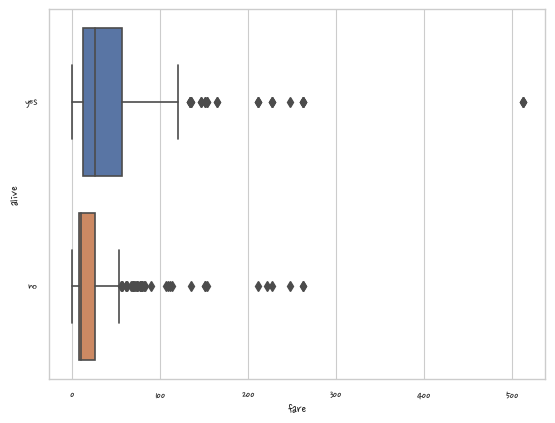

In [52]:
sns.boxplot(data=df, x="fare", y="alive", order=["yes","no"])

<AxesSubplot:>

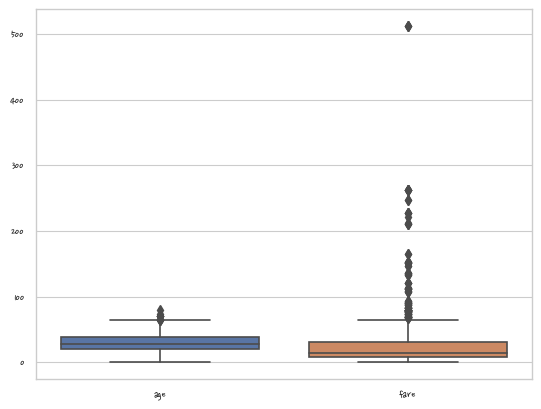

In [56]:
# Draw a box for multiple numeric columns
sns.boxplot(data=df[["age", "fare"]], orient="v")

### violinplot()

<AxesSubplot:xlabel='age'>

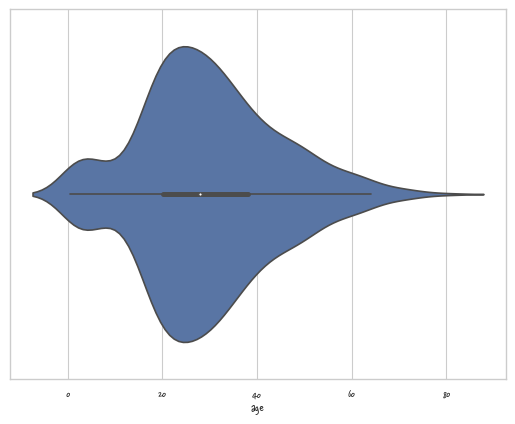

In [102]:
# Draw a single horizontal boxplot,
# assingning the data directly to the cro
df = sns.load_dataset("titanic")
sns.violinplot(x=df["age"])

<AxesSubplot:xlabel='age', ylabel='class'>

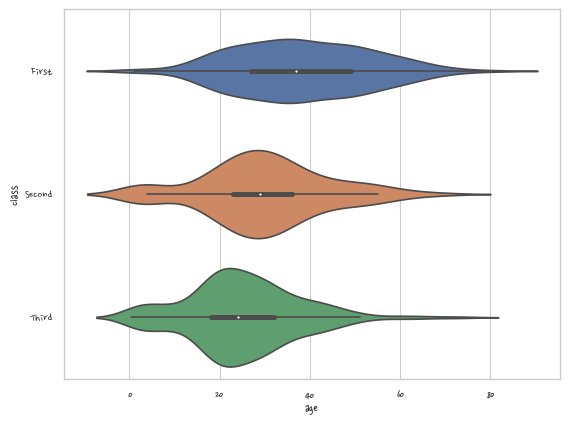

In [104]:
# Group by a catrgorical variable
# referencing columns in a dataframe
sns.violinplot(data=df, x="age", y="class")

<AxesSubplot:xlabel='class', ylabel='age'>

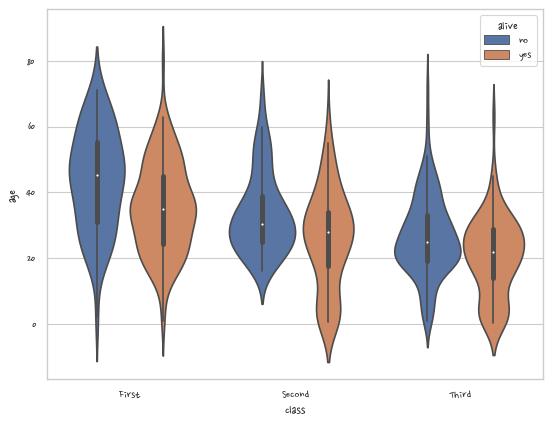

In [107]:
# Draw vertical violins, grouped by two variables
sns.violinplot(data=df, x="class", y="age", hue="alive")

<AxesSubplot:xlabel='deck', ylabel='age'>

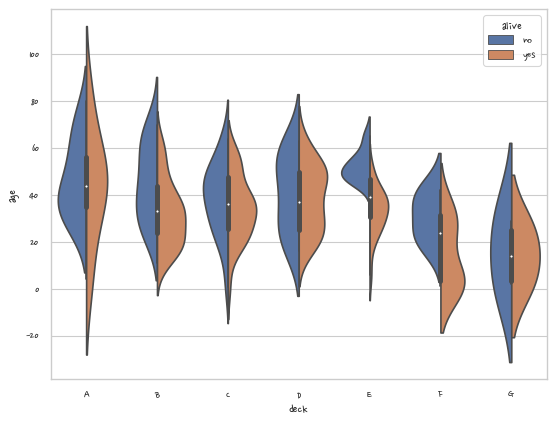

In [109]:
# Draw split violins to take up less space
sns.violinplot(data=df, x="deck", y="age", hue="alive", split=True)

- hue의 level이 정확히 2개가 아니라면 ValueError를 반환합니다.

In [111]:
# Draw split violins to take up less space
sns.violinplot(data=df, x="deck", y="age", hue="class", split=True)

ValueError: There must be exactly two hue levels to use `split`.'

<AxesSubplot:xlabel='age', ylabel='alive'>

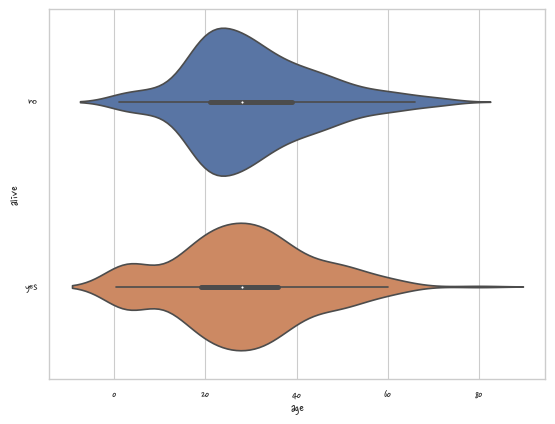

In [113]:
sns.violinplot(data=df, x="age", y="alive")

<AxesSubplot:xlabel='age', ylabel='alive'>

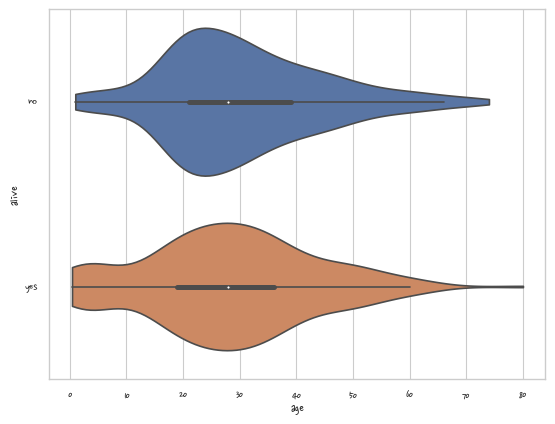

In [122]:
sns.violinplot(data=df, x="age", y="alive", cut=0)

<AxesSubplot:xlabel='age', ylabel='alive'>

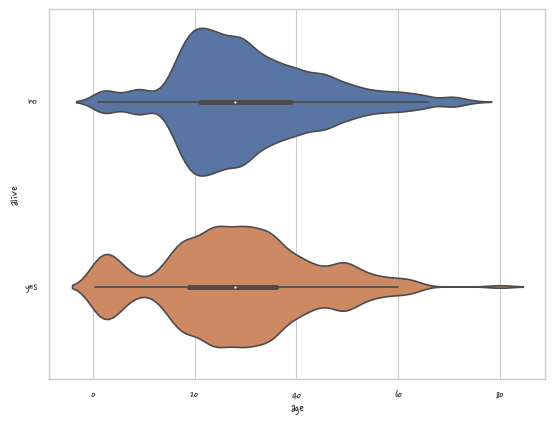

In [126]:
# Use a narrower bandwidth to reduce the amount of smoothing
sns.violinplot(data=df, x="age", y="alive", bw=.15)

<AxesSubplot:xlabel='age', ylabel='embark_town'>

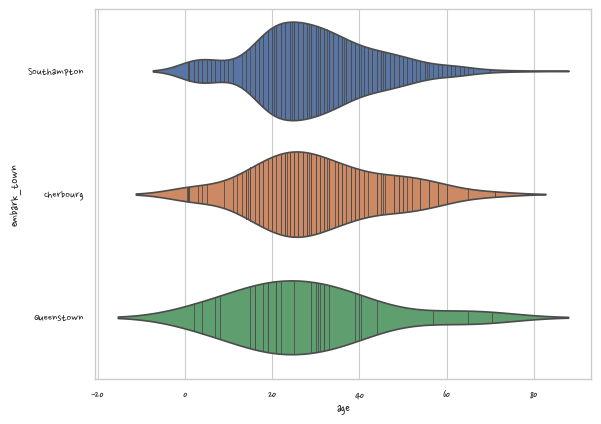

In [132]:
# Represent every observation inside the distribution
sns.violinplot(data=df, x="age", y="embark_town", inner="stick")

<AxesSubplot:xlabel='age', ylabel='embark_town'>

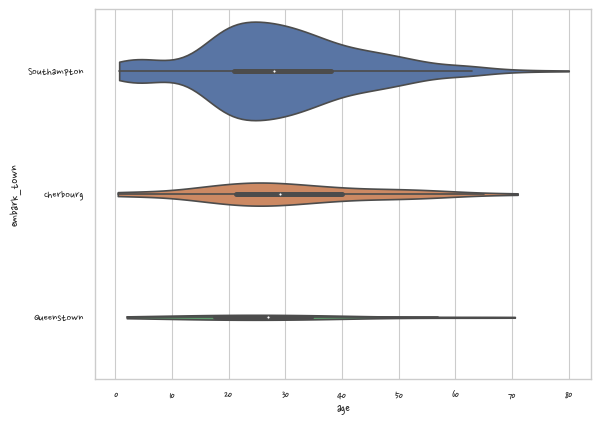

In [134]:
# Use a different scaling rule for normalizing the density
sns.violinplot(data=df, x="age", y="embark_town", scale="count", cut=0)

### stripplot()

- 카테고리마다의 scatter plot을 그린다.
- jitter를 사용하는데 이 방식은 다른 축의 방형으로 랜덤하게 점을 찍어 겹치는 부분을 줄인다.
- 이 방식은 box plot과 violin의 방식을 보완한다.

<AxesSubplot:xlabel='total_bill'>

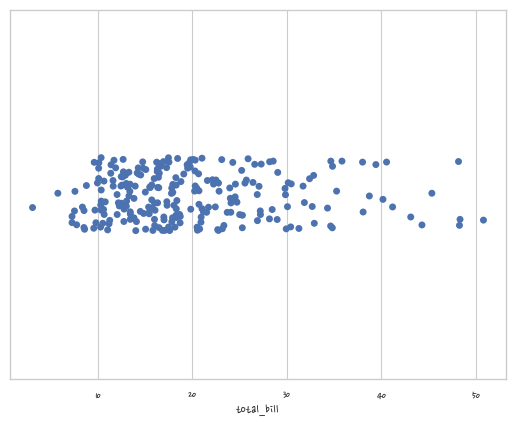

In [183]:
# Assigning a single numeric variable shows 
# its univariate distribution
# with points randomly “jittered” on the other axis
tips = sns.load_dataset("tips")
sns.stripplot(data=tips, x="total_bill")

<AxesSubplot:xlabel='total_bill', ylabel='day'>

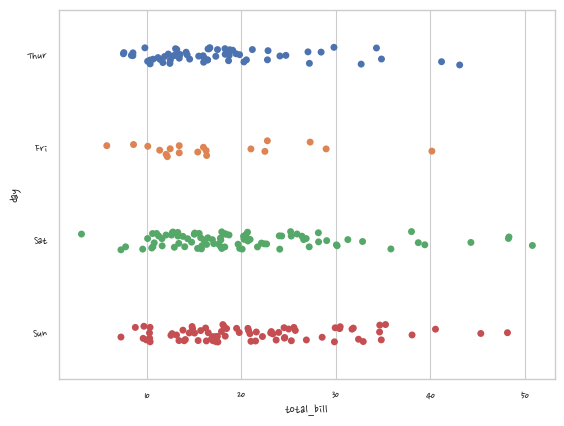

In [184]:
# Assigning a second variable splits the strips of points 
# to compare categorical levels of that variable
sns.stripplot(data=tips, x="total_bill", y="day")

<AxesSubplot:xlabel='day', ylabel='total_bill'>

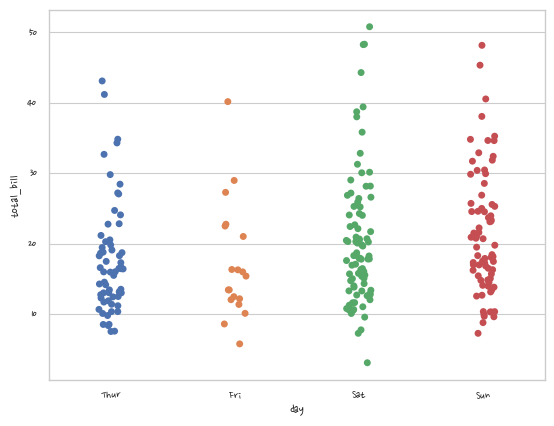

In [185]:
# Show vertically-oriented strips by swapping
# the assignment of the categorical and numerical variables
sns.stripplot(data=tips, x="day", y="total_bill")

<AxesSubplot:xlabel='total_bill', ylabel='day'>

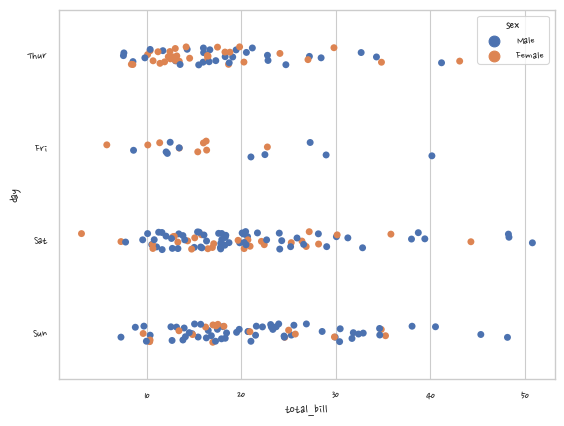

In [143]:
# Or you can assign a distinct variable to hue to show a multidimensional relationship
sns.stripplot(data=tips, x="total_bill", y="day", hue="sex")

<AxesSubplot:xlabel='total_bill', ylabel='day'>

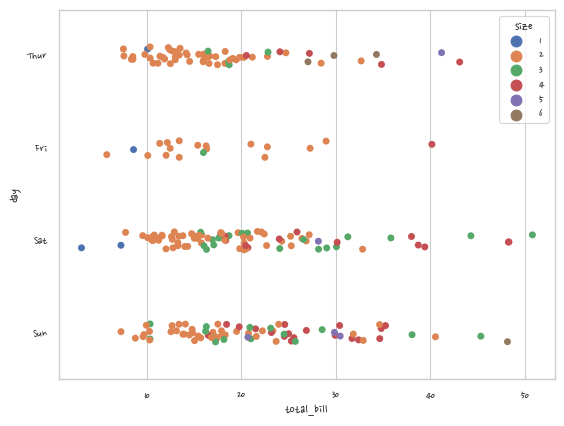

In [145]:
# If the hue variable is numeric,
# it will be mapped with a quantitative palette by default 
# (note that this was not the case prior to version 0.12)
sns.stripplot(data=tips, x="total_bill", y="day", hue="size")

<AxesSubplot:xlabel='total_bill', ylabel='day'>

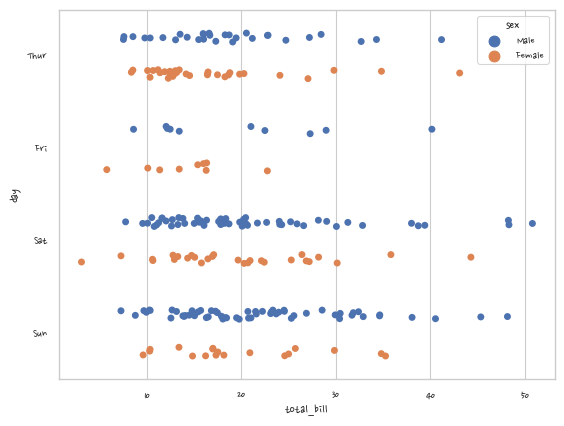

In [186]:
# By default, the different levels of the hue variable are intermingled in each strip,
# but setting dodge=True will split them
sns.stripplot(data=tips, x="total_bill", y="day", hue="sex", dodge=True)

### swarmplot()

- strip plot과 매우 흡사하지만 데이터 마커로 표현할 때 절대로 겹치지 않게 표현한다.
- 정확한 데이터의 분포를 표현하기에 더 없이 좋은 그래프이지만, 
- 아주 큰 스케일의 데이터를 표현하기에 필요한 너비가 너무 넓어져 
- 이때는 swarm plot을 사용하기에 적합하지 않다.

<AxesSubplot:xlabel='total_bill'>

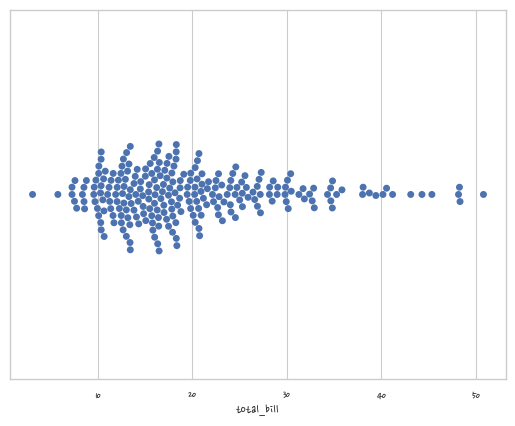

In [176]:
# Assigning a single numeric variable shows its univariate distribution
# with points adjusted along on the other axis such that they don’t overlap
tips = sns.load_dataset("tips")
sns.swarmplot(data=tips, x="total_bill")

<AxesSubplot:xlabel='total_bill', ylabel='day'>

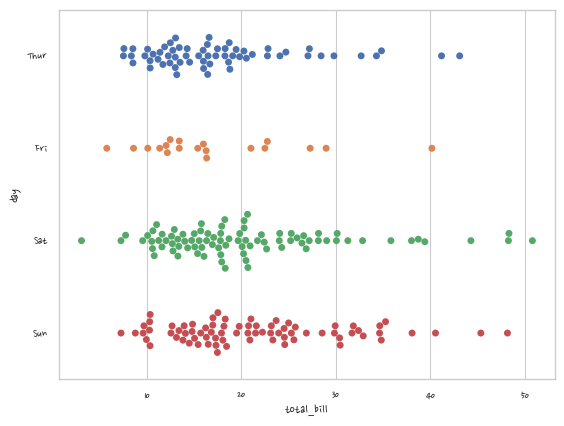

In [177]:
# Assigning a second variable splits 
# the groups of points to compare categorical levels of that variable
sns.swarmplot(data=tips, x="total_bill", y="day")

<AxesSubplot:xlabel='day', ylabel='total_bill'>

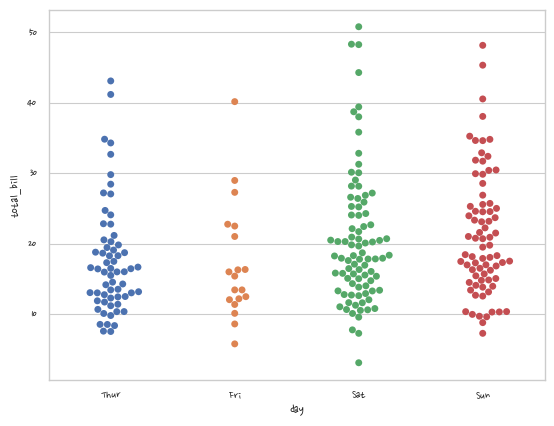

In [178]:
# Show vertically-oriented swarms by swapping 
# the assignment of the categorical and numerical variables
sns.swarmplot(data=tips, x="day", y="total_bill")

<AxesSubplot:xlabel='total_bill', ylabel='day'>

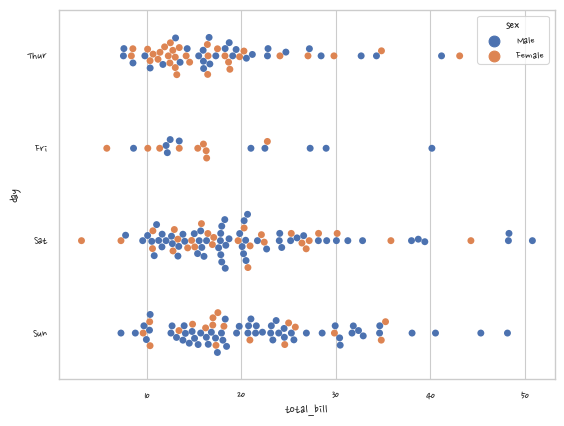

In [179]:
# Or you can assign a distinct variable to hue to show a multidimensional relationship
sns.swarmplot(data=tips, x="total_bill", y="day", hue="sex")

C:\Users\Playdata\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='total_bill', ylabel='day'>

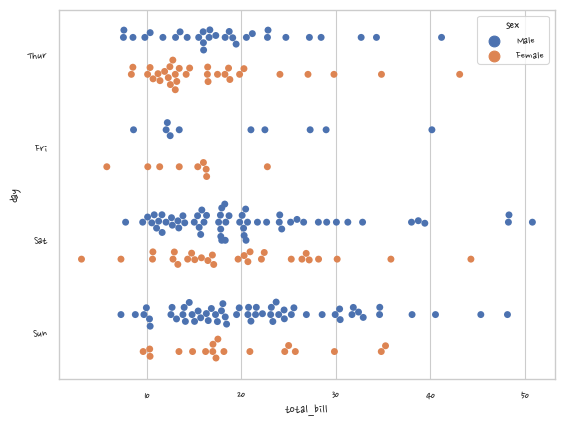

In [180]:
# By default, the different levels of the hue variable are intermingled 
# in each swarm, but setting dodge=True will split them
sns.swarmplot(data=tips, x="total_bill", y="day", hue="sex", dodge=True)

C:\Users\Playdata\anaconda3\lib\site-packages\seaborn\categorical.py:1378: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(swarm_data, cat_pos, s=s, **kws)


<AxesSubplot:xlabel='total_bill', ylabel='day'>

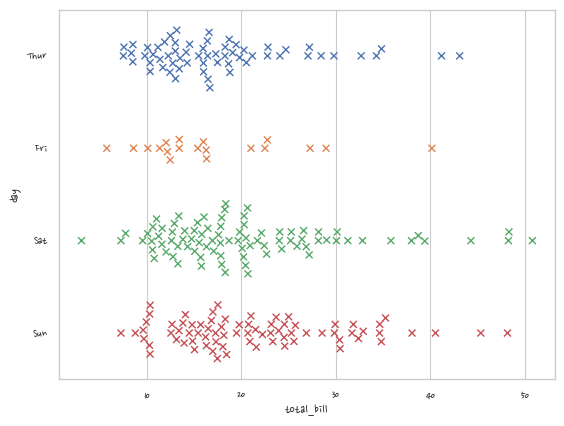

In [181]:
# Further visual customization can be achieved by passing keyword arguments 
# for matplotlib.axes.Axes.scatter()
sns.swarmplot(
    data=tips, x="total_bill", y="day",
    marker="x", linewidth=1,
)

### catplot()

- axes-level(row, col)까지 분류를 나눌 수 있다.
- 카테고리화를 더 세분화 해서 작업할 수 있는 플롯이다.
- kind 키워드 인수를 사용하면 axes-level에 사용할 그래프의 유형을 선택할 수 있다.

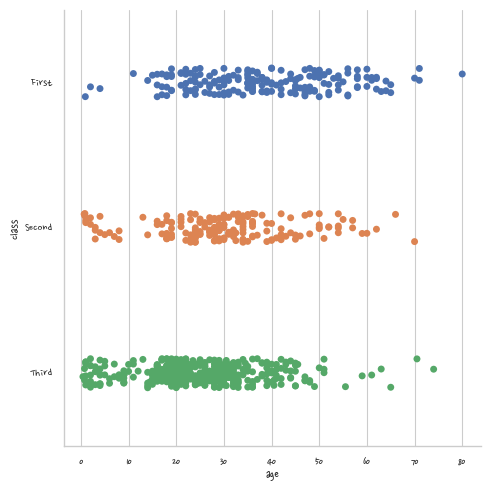

In [182]:
# By default, the visual representation will be a jittered strip plot
df = sns.load_dataset("titanic")
sns.catplot(data=df, x="age", y="class")

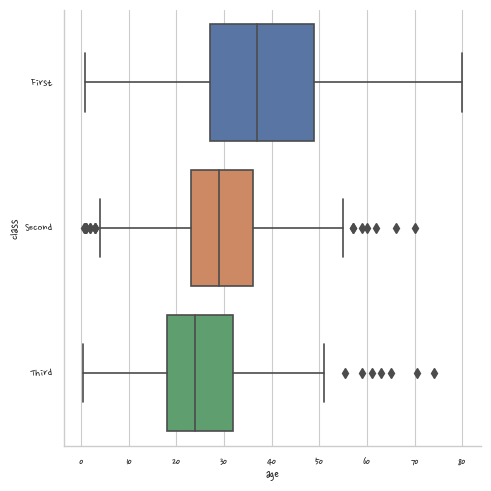

In [174]:
# Use kind to select a different representation
sns.catplot(data=df, x="age", y="class", kind="box")

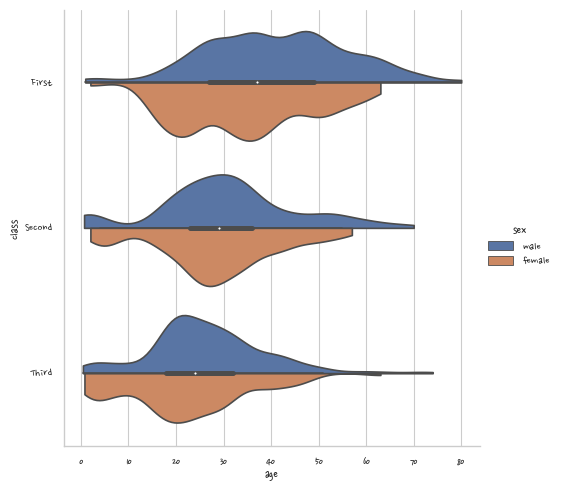

In [192]:
# Additional keyword arguments get passed through 
# to the underlying seaborn function
sns.catplot(
    data=df, x="age", y="class", hue="sex",
    kind="violin", bw=.25, cut=0, split=True,
)

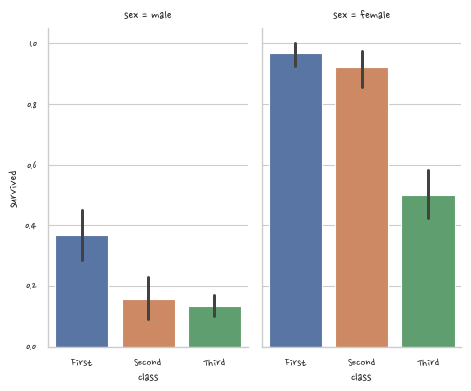

In [191]:
# Assigning a variable to col or row will automatically create subplots. 
# Control figure size with the height and aspect parameters
sns.catplot(
    data=df, x="class", y="survived", col="sex",
    kind="bar", height=4, aspect=.6,
)

<AxesSubplot:xlabel='age', ylabel='class'>

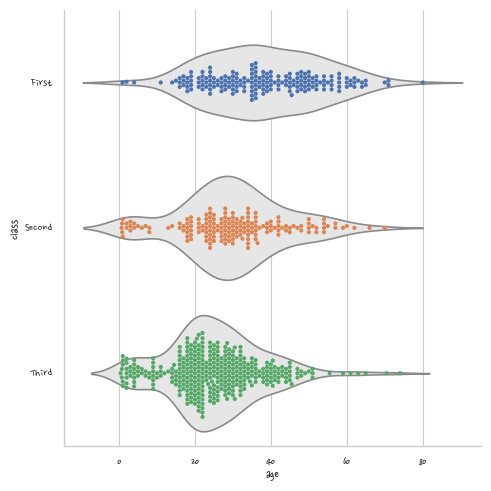

In [190]:
# For single-subplot figures, it is easy to layer different representations
sns.catplot(data=df, x="age", y="class", kind="violin", color=".9", inner=None)
sns.swarmplot(data=df, x="age", y="class", size=3)

### jointplot()

- 두 개의 변수의 분포를 나타낼 때 활용하면 좋은 플롯이다.
- histogram과 scatter plot을 같이 사용할 때 좋다.

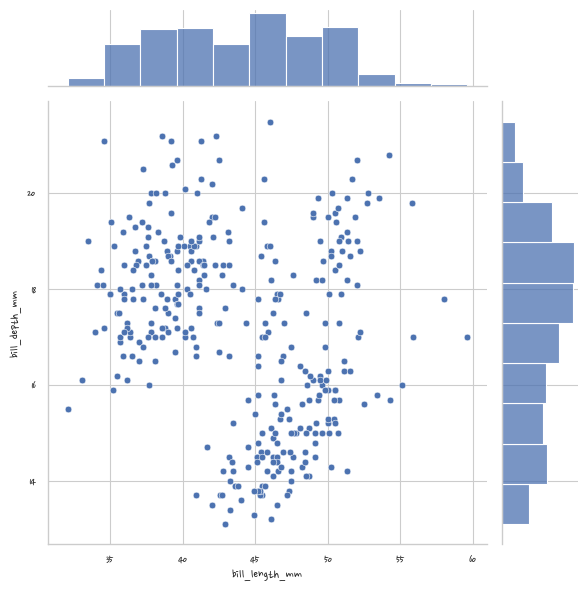

In [194]:
# In the simplest invocation, 
# assign x and y to create a scatterplot (using scatterplot()) 
# with marginal histograms (using histplot())
penguins = sns.load_dataset("penguins")
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")

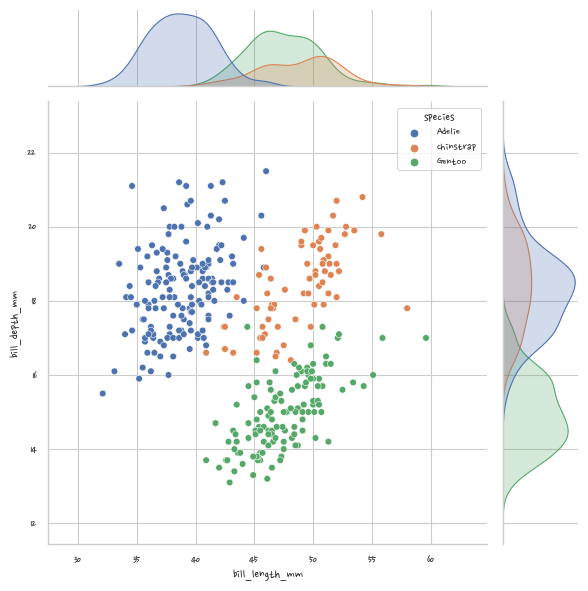

In [195]:
# Assigning a hue variable will add conditional colors to the scatterplot 
# and draw separate density curves (using kdeplot()) on the marginal axes
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")

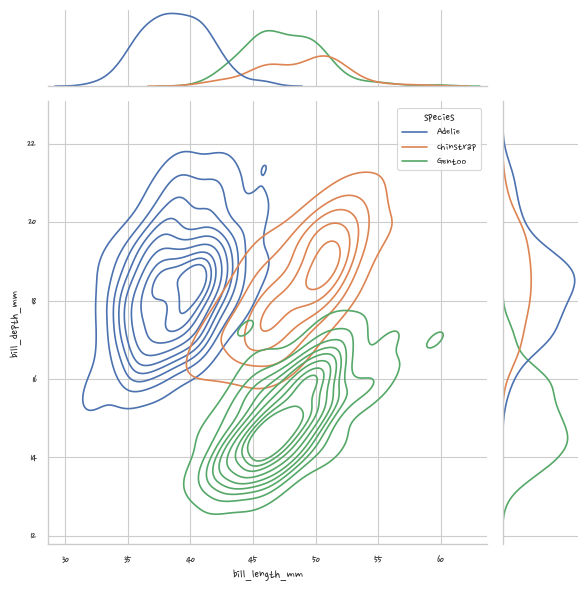

In [197]:
# Several different approaches to plotting are available through the kind parameter. 
# Setting kind="kde" will draw both bivariate and univariate KDEs
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species", kind="kde")

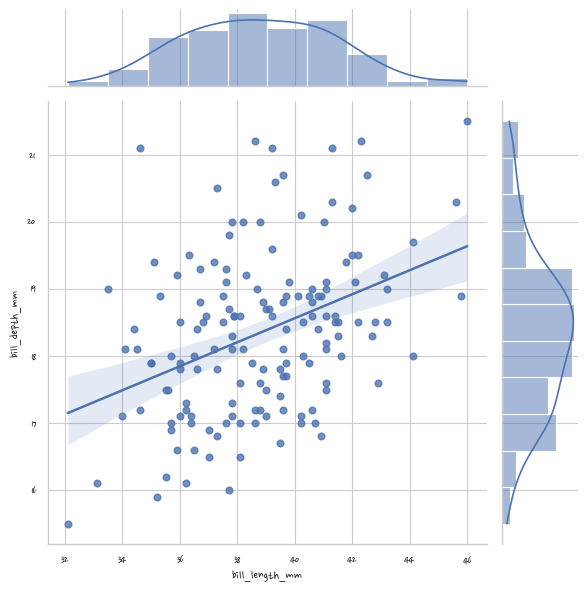

In [206]:
# Set kind="reg" to add a linear regression fit (using regplot()) 
# and univariate KDE curves
adlie_penguins = penguins[penguins["species"] == "Adelie"]
sns.jointplot(data=adlie_penguins, x="bill_length_mm", y="bill_depth_mm", kind="reg")

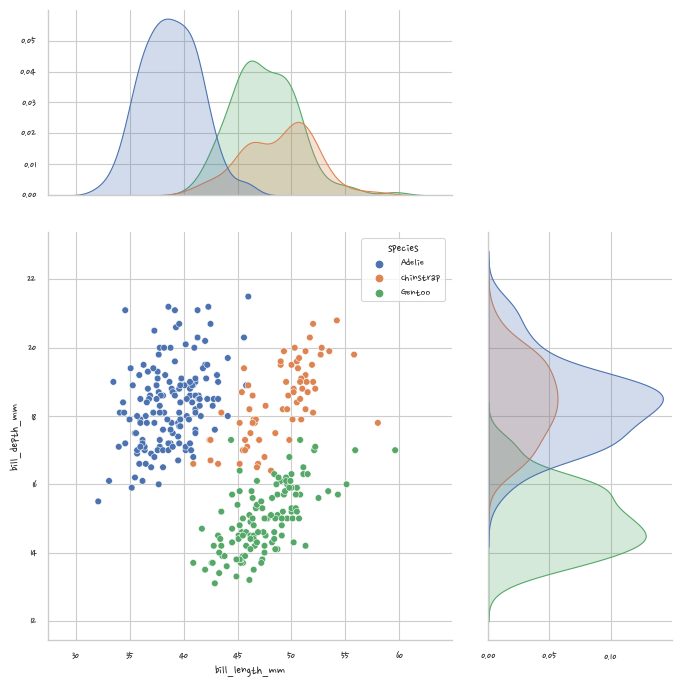

In [207]:
# Use JointGrid parameters to control the size and layout of the figure
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species",
              height=7, ratio=2, marginal_ticks=True)

### pairplot()

- 데이터셋 내의 각 column마다 pair로 경우에 수에 따라 묶고
- 그에 따른 결과를 일목요연하게 한번에 확인할 수있는 플롯이다.

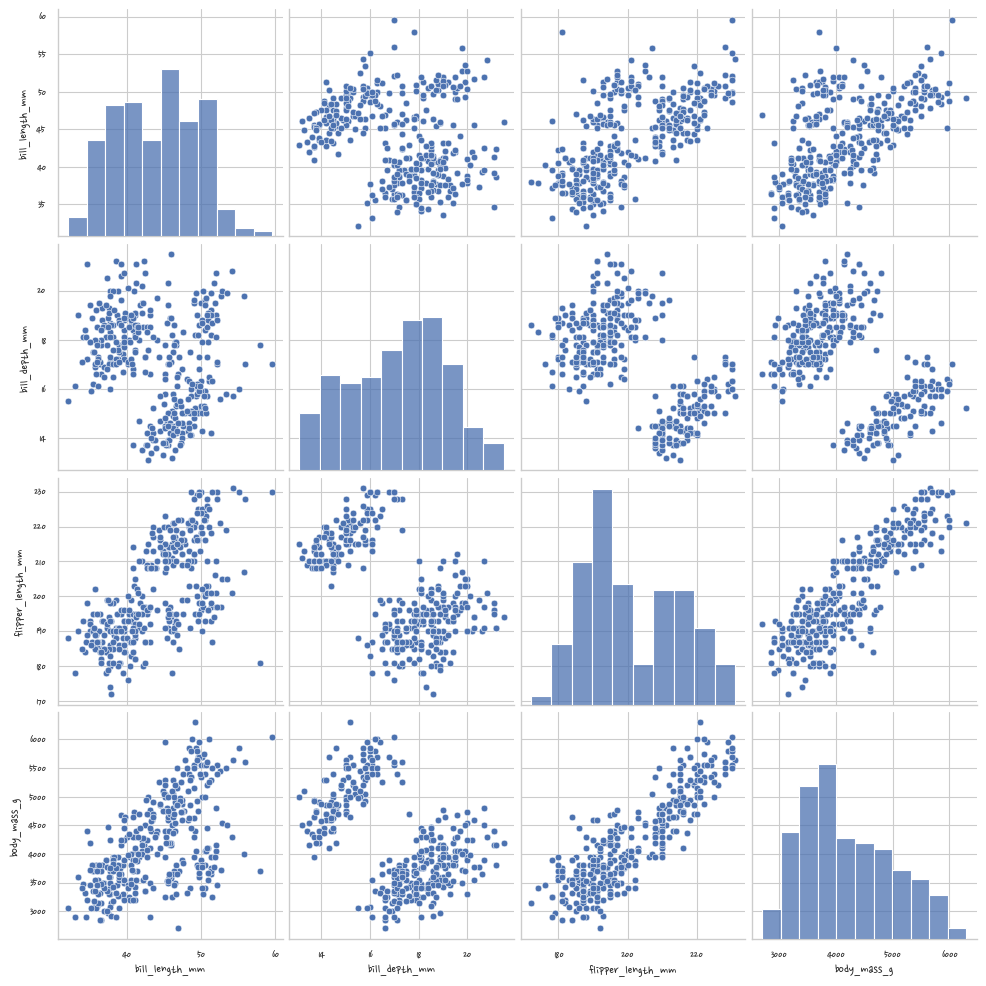

In [209]:
# The simplest invocation uses scatterplot() 
# for each pairing of the variables and histplot() 
# for the marginal plots along the diagonal
penguins = sns.load_dataset("penguins")
sns.pairplot(penguins)

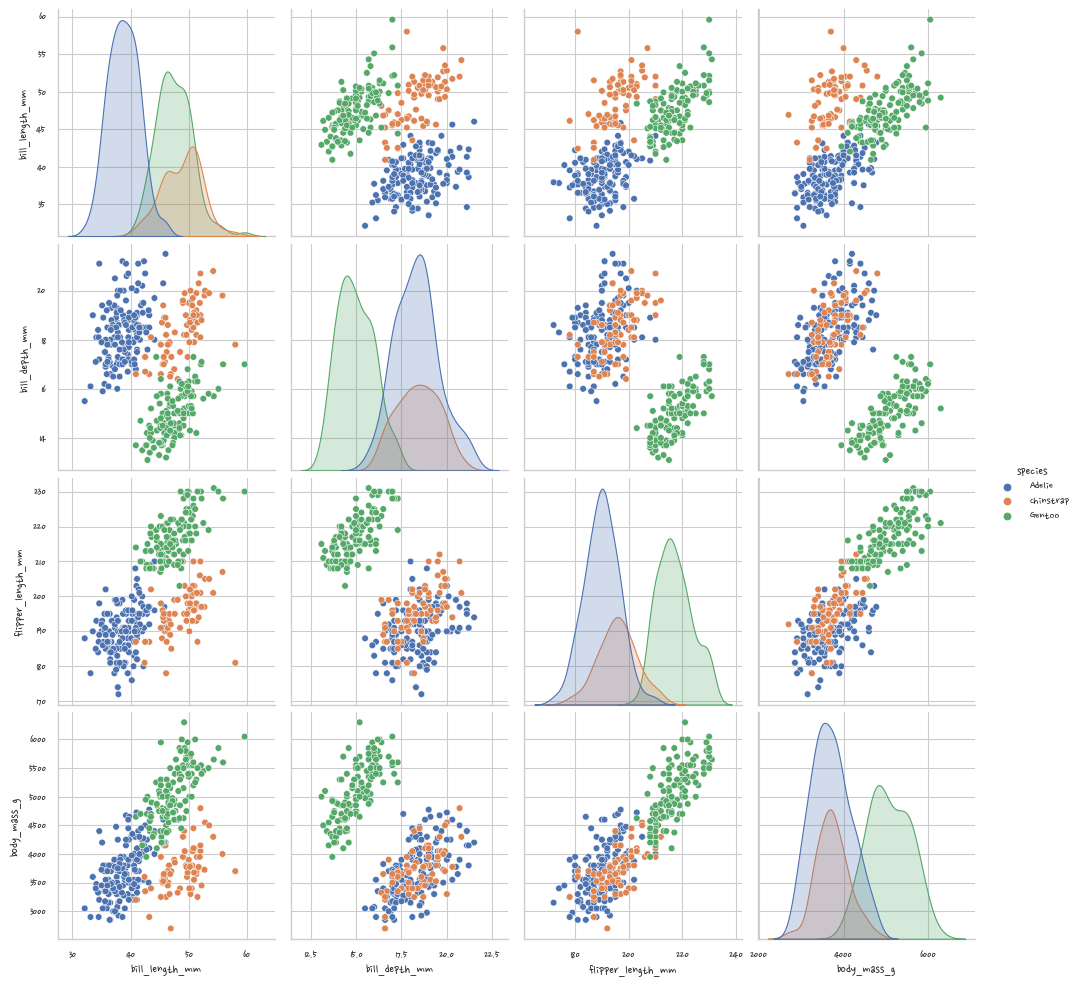

In [212]:
# Assigning a hue variable adds a semantic mapping 
# and changes the default marginal plot 
# to a layered kernel density estimate (KDE)
sns.pairplot(penguins, hue="species")

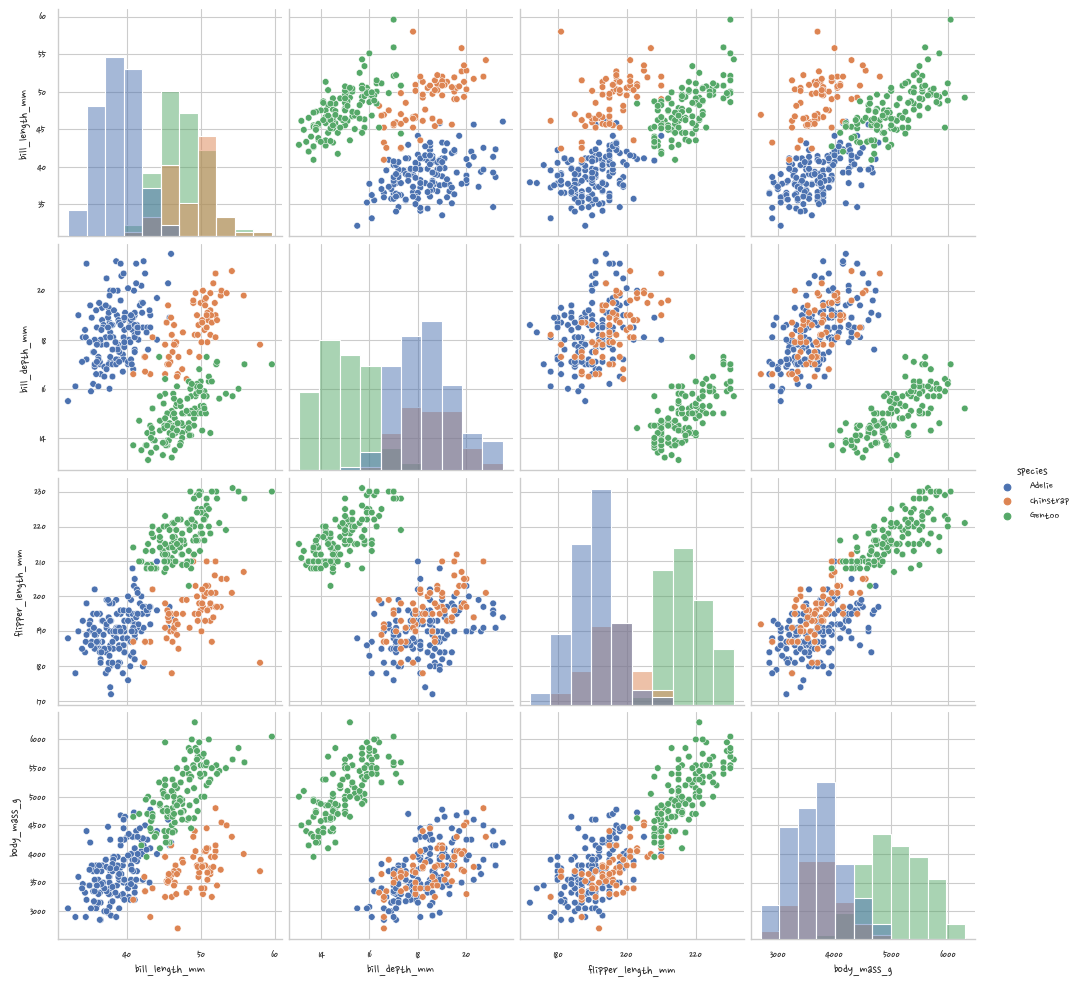

In [213]:
# It’s possible to force marginal histograms
sns.pairplot(penguins, hue="species", diag_kind="hist")

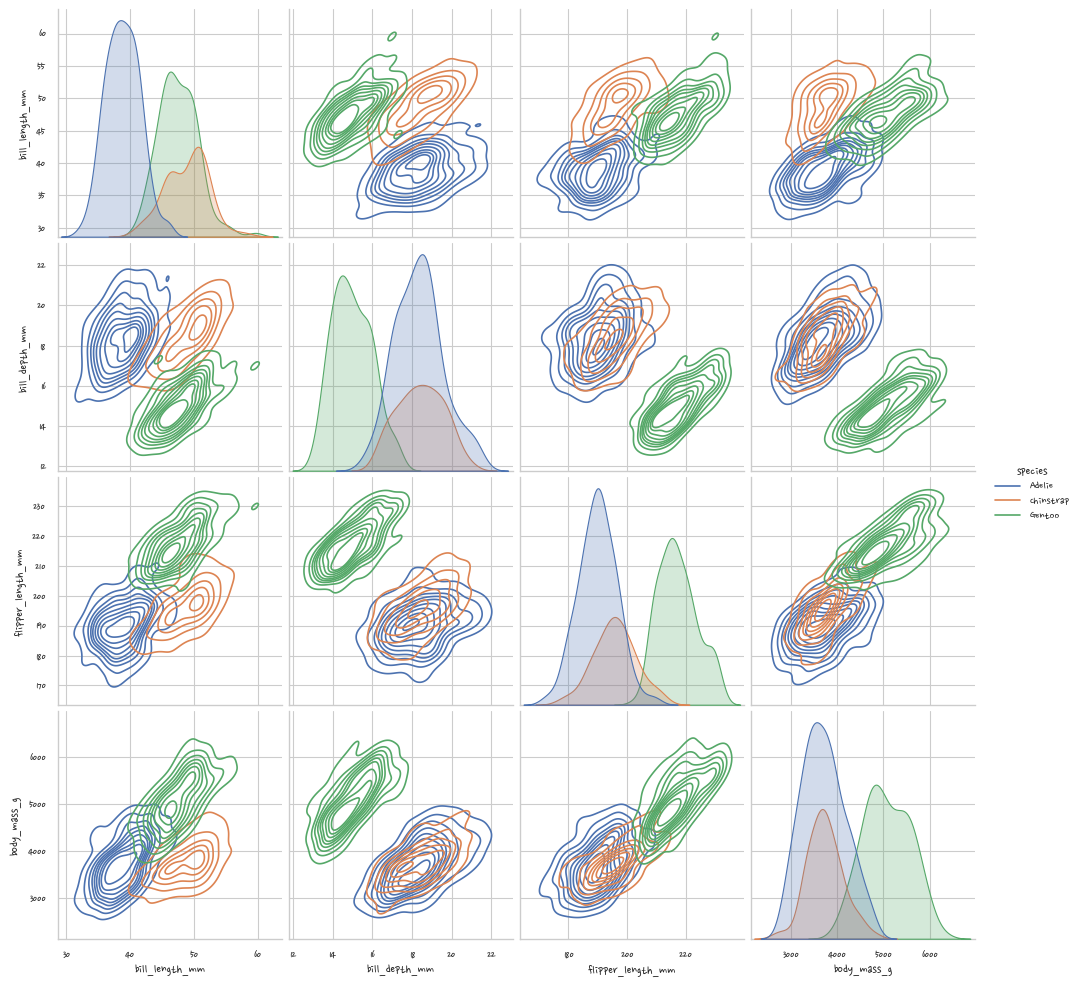

In [217]:
# The kind parameter determines both the diagonal 
# and off-diagonal plotting style. 
# Several options are available, including using kdeplot() to draw KDEs
sns.pairplot(penguins, hue="species", kind="kde")

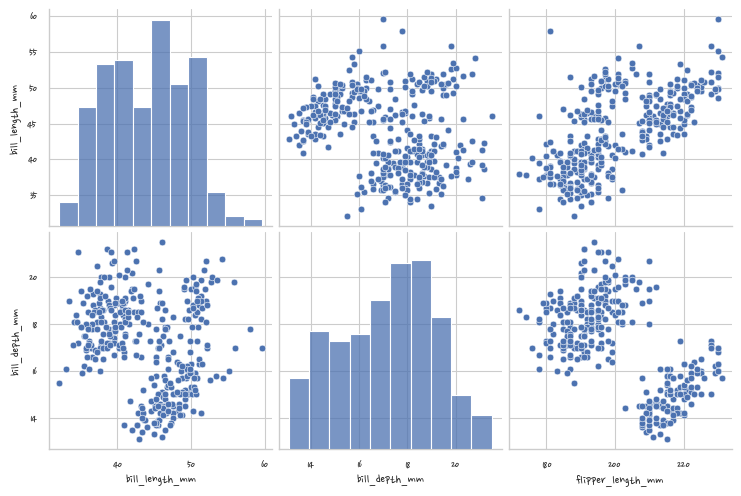

In [218]:
# Use vars or x_vars and y_vars to select the variables to plot
sns.pairplot(
    penguins,
    x_vars=["bill_length_mm", "bill_depth_mm", "flipper_length_mm"],
    y_vars=["bill_length_mm", "bill_depth_mm"],
)

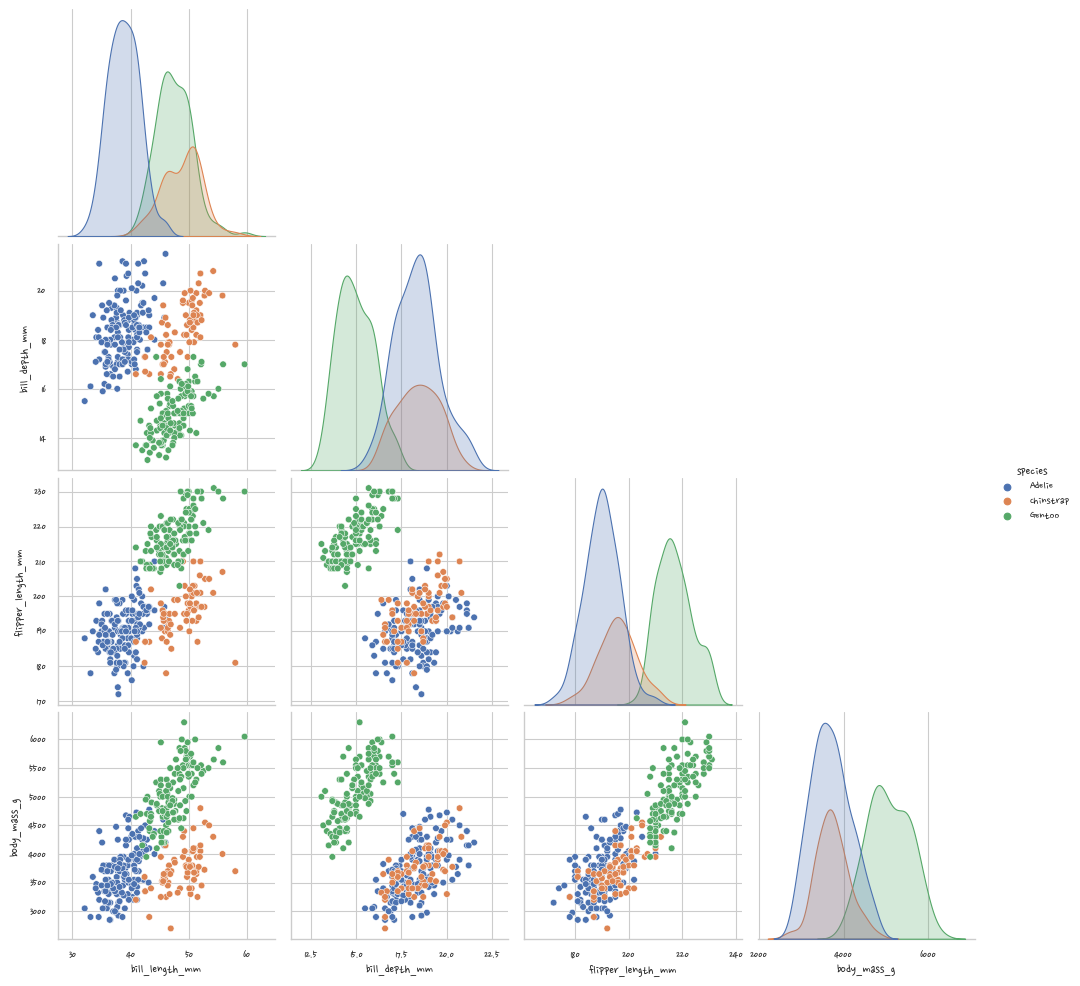

In [219]:
# Set corner=True to plot only the lower triangle
sns.pairplot(penguins, hue="species", corner=True)

### heatmap

<AxesSubplot:xlabel='who', ylabel='class'>

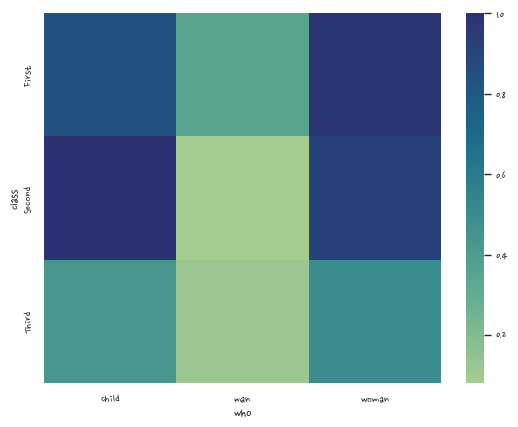

In [249]:
sns.load_dataset("titanic")
ttn_cls_who = pd.pivot_table(df, "survived", index="class", columns="who")
sns.heatmap(ttn_cls_who, cmap="crest")

<AxesSubplot:xlabel='who', ylabel='class'>

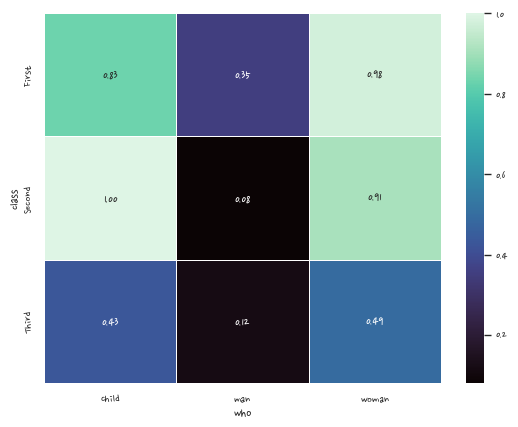

In [246]:
sns.heatmap(ttn_cls_who, cmap="mako", annot=True, fmt=".2f", linewidth=.5)

### 연습문제

#### 각자 선호하는 데이터셋을 선택하고 그 데이터셋을 가지고 지금까지 배운 Seaborn
그래프를 통해서 의미있는 결과를 각자 도출해보세요.

In [290]:
dia = sns.load_dataset("diamonds")
dia.clarity.value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

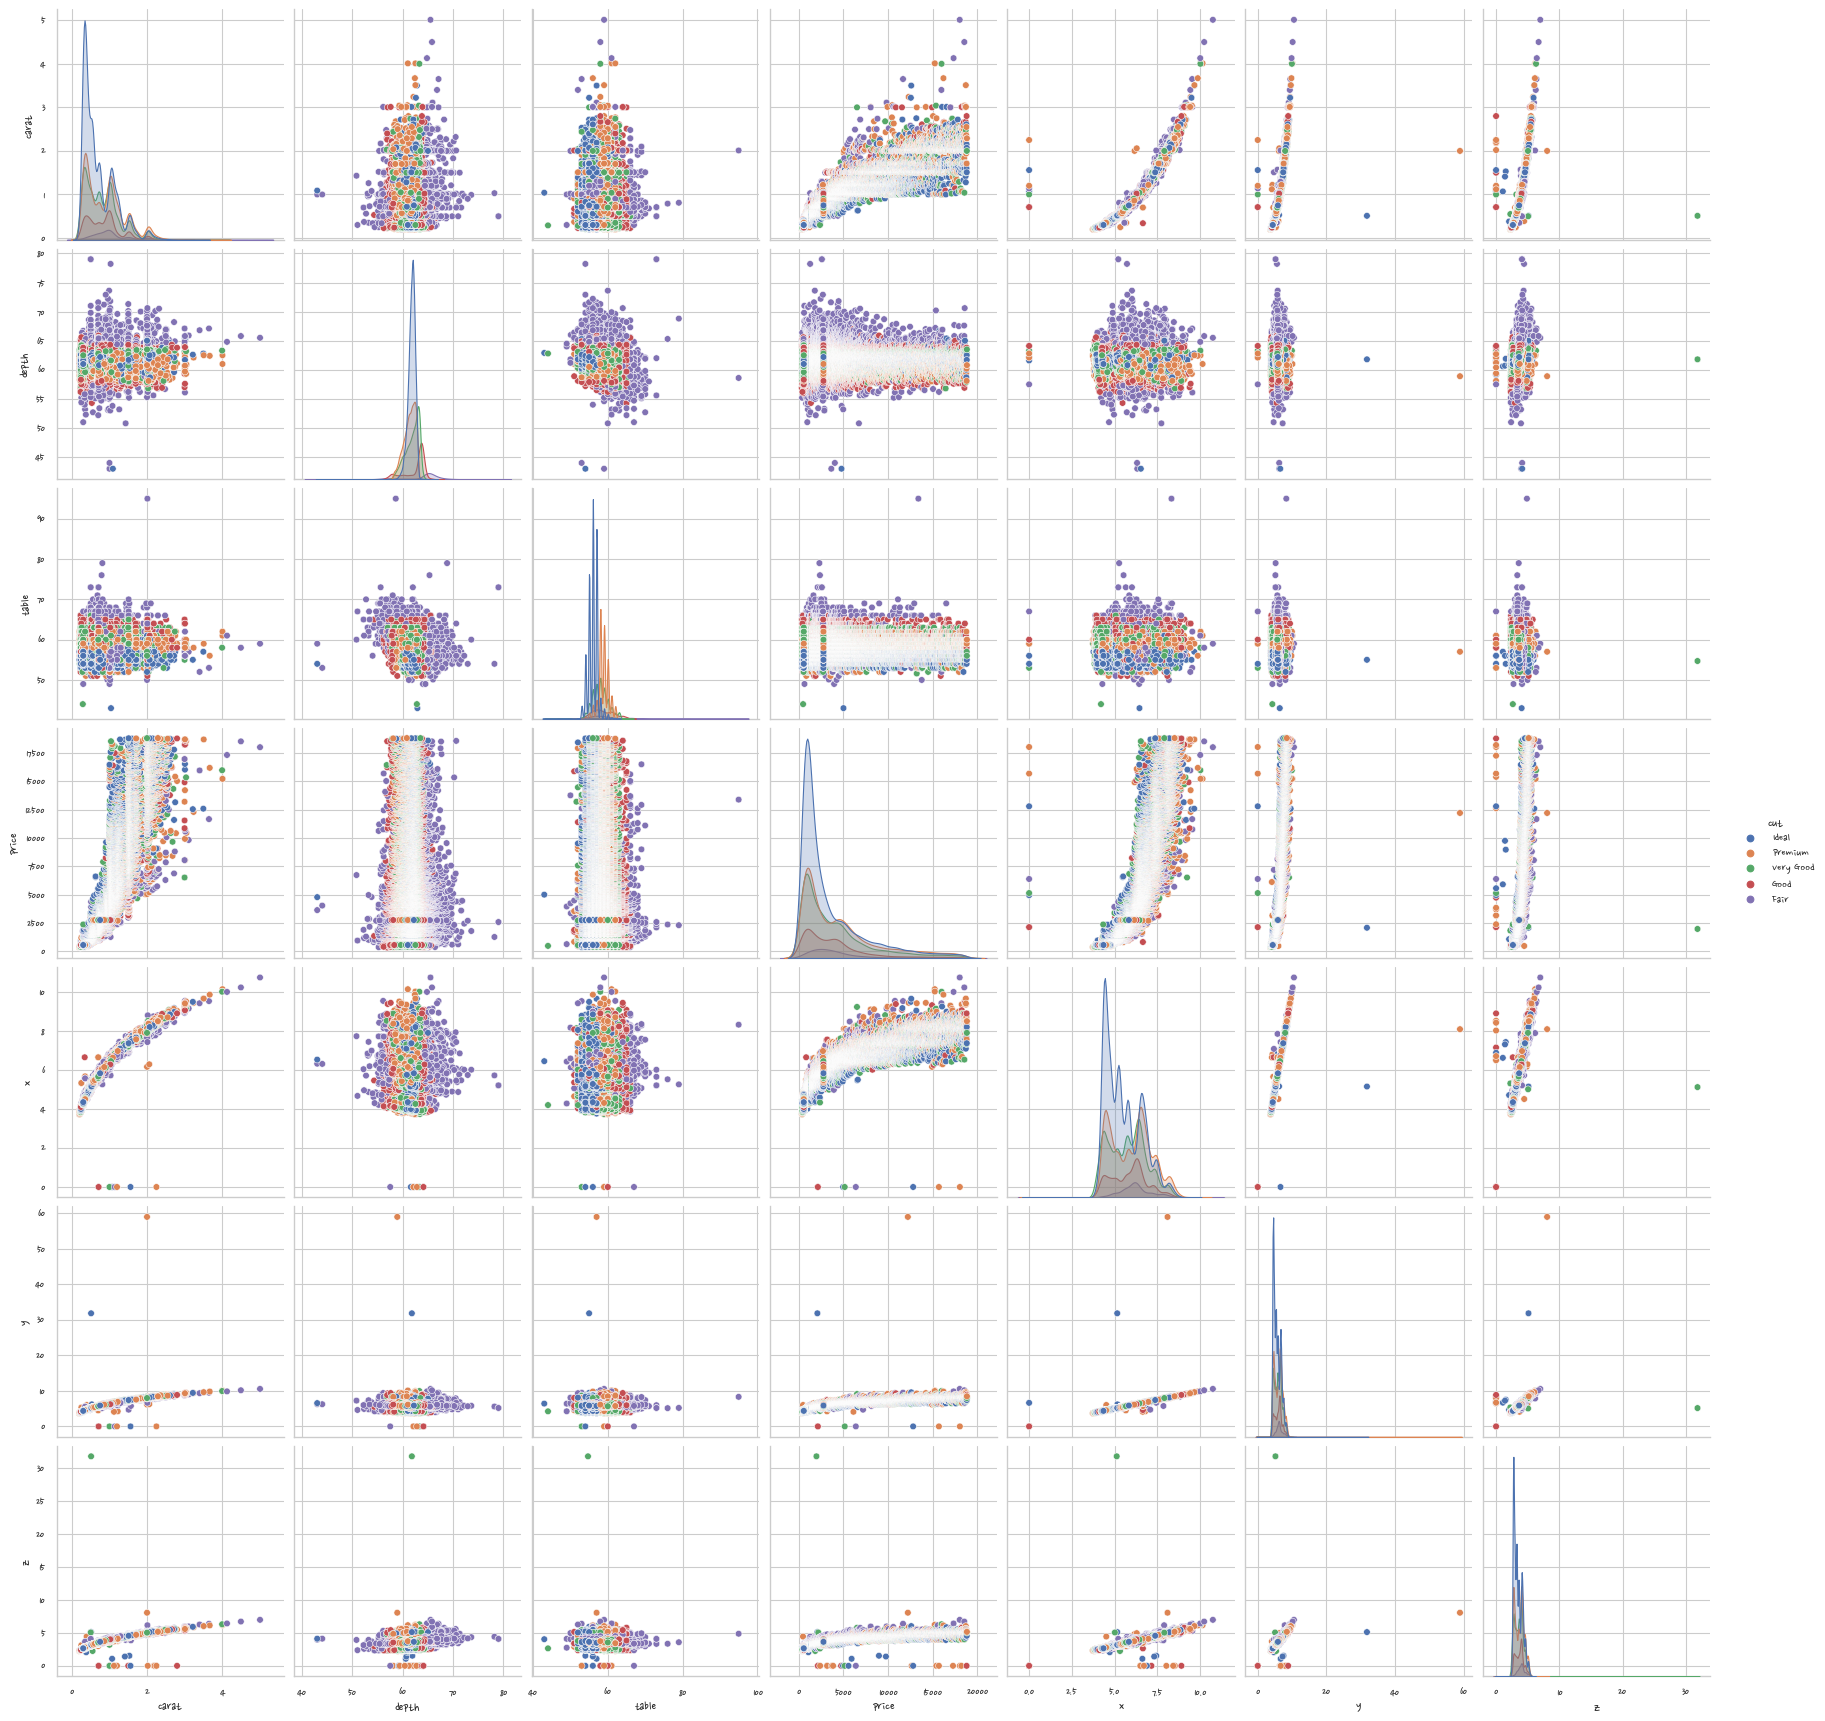

In [298]:
sns.pairplot(dia, hue="cut")

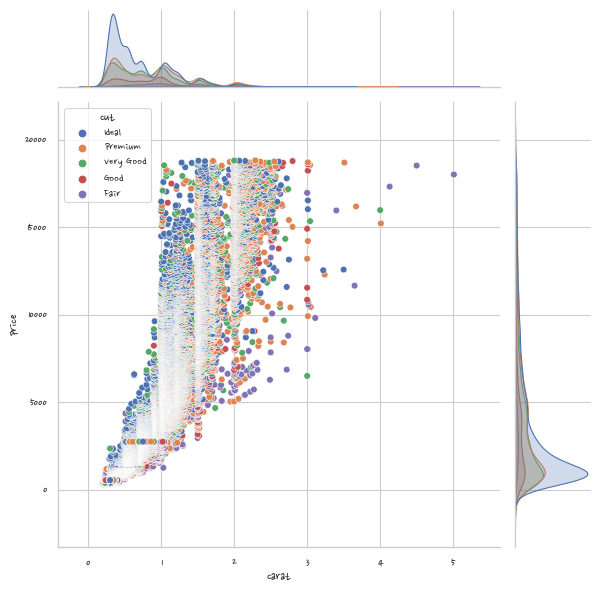

In [296]:
sns.jointplot(data=dia, x="carat", y="price", hue="cut")

<AxesSubplot:xlabel='clarity', ylabel='price'>

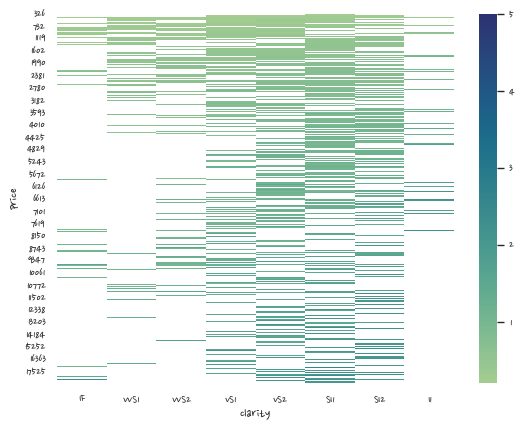

In [284]:
dia_ccc = pd.pivot_table(dia, "carat", index="price", columns="clarity")
sns.heatmap(dia_ccc, cmap="crest")